<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/BR_2013_2018_consumo_clima_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa de análise e limpeza de dados

Generalizando para todas as classes de consumo BR

* Clima IMPE
* Consumo Anuário EPE:
    - Comercial	
    - Consumo Próprio	
    - Iluminação Pública	
    - Industrial	
    - Poder Público	
    - Residencial	
    - Rural	
    - Serviço Público

por Leandro Barbosa

##Declarações

In [ ]:
pip install -U scikit-learn

In [ ]:
import math
import matplotlib.pyplot    as plt
import matplotlib.ticker    as ticker
import matplotlib.style     as style
import numpy                as np
import seaborn              as sns
import pandas               as pd

from urllib.request                 import urlopen
from zipfile                        import ZipFile
from statsmodels.graphics.tsaplots  import plot_acf, plot_pacf
from statsmodels.tsa.seasonal       import seasonal_decompose
from sklearn.metrics                import mean_squared_error
from sklearn.metrics                import mean_absolute_percentage_error
from sklearn.linear_model           import LinearRegression

stl = style.available
%matplotlib inline

In [ ]:
swap        = '/tmp/'
url2019     = 'https://drive.google.com/uc?id=1Zr21cViYLsFcA8UVVN0BCK-1hFbSMqQP&export=download'
urlINMET    = 'https://drive.google.com/u/0/uc?id=1FNrp311pEegFczI7NWCCXqG5BVPSHd6e&export=download'
urlINMETRS    = 'https://github.com/lvb86/MLPr_GA/blob/4c119c5d100c0e9b808e3b3775c1c64713b7844d/data/INMET.zip?raw=true'

In [ ]:
mes = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
mesN = [1,2,3,4,5,6,7,8,9,10,11,12]

palettes = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
            'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
            'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
            'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
            'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
            'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
            'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
            'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
            'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
            'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3',
            'Set3_r', 'Spectral', 'Spectral_r',
            #'Vega10', 'Vega10_r', 'Vega20',
            'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 
            'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
            'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
            'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
            'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 
            'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
            'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
            'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
            'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
            'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
            'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
            'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
            #'jet', ##'jet_r', 
            'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',
            'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma',
            'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
            'rocket_r', 'seismic', 'seismic_r', ##'spectral', 'spectral_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
            'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            'terrain', 'terrain_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r',
            'winter', 'winter_r']

# Definições de estilo
if 1==1: #tema Claro para artigo retrato
    DefPalette = palettes[13] #13 Dark2
    DefPaletteHist = 'rocket'
    DefStyle = stl[15] #15 Seaborn-Darkgrid
    DefSize = (10,6) #(17,6)
    DefGrid = ('-')

else: # tema Escuro para apresentação paisagem
    DefPalette = palettes[123] #123 - hsv
    DefPaletteHist = 'rocket'
    DefStyle = stl[4] #15 dark_background
    DefSize = (10,6) #(17,6)
    DefGrid = (':')
    plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 
                    'ytick.color':'white', 'figure.facecolor':'black'})


In [ ]:
# Para traduzir ticker para PT-BR
def formatador_de_milhares(valor, p):
    valor = f"{valor:,.0f}"
    mapa_de_traducao = str.maketrans(',.', '.,')
    return valor.translate(mapa_de_traducao)
#exemplo de uso 
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
#Powered by @lpeixoto2000

## Análise de Consumo de Energia

### Importação dos dados

In [ ]:
# Data Frame Original
anuario2013_2018 = pd.read_csv(url2019, encoding='UTF8', parse_dates=True, index_col='Data')
anuario2013_2018.head()

TipoConsumidor Sistema  ... Consumidores Consumo
Data                               ...                     
2013-01-01         Cativo     Sul  ...          2.0    16.0
2013-02-01         Cativo     Sul  ...          2.0    21.0
2013-03-01         Cativo     Sul  ...          2.0    18.0
2013-04-01         Cativo     Sul  ...          2.0    16.0
2013-05-01         Cativo     Sul  ...          2.0    17.0

[5 rows x 14 columns]

In [ ]:
anuario2013_2018.index.year.unique()

Int64Index([2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='Data')

In [ ]:
anuario2013_2018.columns

Index(['TipoConsumidor', 'Sistema', 'UF', 'SetorN1', 'SetorN2', 'SetorN3',
       'Tensão N1', 'Tensão N2', 'Tensão N3', 'Tensão N4',
       'Faixa de Consumo N1', 'Faixa de Consumo N2', 'Consumidores',
       'Consumo'],
      dtype='object')

In [ ]:
SetorN1 = anuario2013_2018['SetorN1'].unique()
SetorN1

array(['Comercial', 'Consumo Próprio', 'Iluminação Pública', 'Industrial',
       'Poder Público', 'Residencial', 'Rural', 'Serviço Público'],
      dtype=object)

In [ ]:
anuario2013_2018 = anuario2013_2018.reset_index()
anuario2013_2018['Ano'] = anuario2013_2018['Data'].dt.year
anuario2013_2018['Mês'] = anuario2013_2018['Data'].dt.month
anuario2013_2018['Ano Mês'] = anuario2013_2018['Data'].astype(str)
anuario2013_2018['Ano Mês'] = anuario2013_2018['Ano Mês'].str.slice(0,7)
#dfrs.drop(columns=['Data'], inplace= True)
anuario2013_2018 = anuario2013_2018.groupby(['Ano','Mês','Data','Ano Mês','SetorN1','UF']).sum(['Consumo']).drop(columns='Consumidores')

anuario2013_2018.sample(5)

Consumo
Ano  Mês Data       Ano Mês SetorN1         UF             
2016 10  2016-10-01 2016-10 Industrial      MT   156307.000
2017 12  2017-12-01 2017-12 Consumo Próprio PE     3785.000
2018 12  2018-12-01 2018-12 Rural           RR     3785.213
2017 6   2017-06-01 2017-06 Residencial     SP  3122230.000
     8   2017-08-01 2017-08 Industrial      PB   122234.000

In [ ]:
# Separando o ano de 2018 para validação
anuario2018 = anuario2013_2018.query("Ano=='2018'")
anuario2018.sample(5)

Consumo
Ano  Mês Data       Ano Mês SetorN1         UF             
2018 7   2018-07-01 2018-07 Residencial     SP  3191665.530
     8   2018-08-01 2018-08 Serviço Público AL    18486.000
     9   2018-09-01 2018-09 Industrial      MA   110561.739
     8   2018-08-01 2018-08 Rural           RO    30402.695
     3   2018-03-01 2018-03 Residencial     RO   100081.623

### Análise BR

In [ ]:
# Separando o estado RS o ano de 2018 para validação
anuario2018RS = anuario2018.query("UF == 'RS'")
anuario2018RS.sample(5)

Consumo
Ano  Mês Data       Ano Mês SetorN1       UF            
2018 11  2018-11-01 2018-11 Rural         RS  310718.774
     8   2018-08-01 2018-08 Poder Público RS   58458.728
     3   2018-03-01 2018-03 Residencial   RS  766321.173
     2   2018-02-01 2018-02 Industrial    RS  777367.768
     8   2018-08-01 2018-08 Comercial     RS  377802.646

In [ ]:
anuario2018RS['Consumo'].sum()/1000_000

30.417987882

Recorte do anuário 2018 para Validação. 

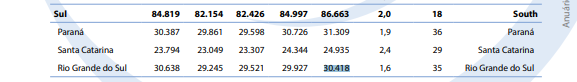

#### Consumo Por Setor N1

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

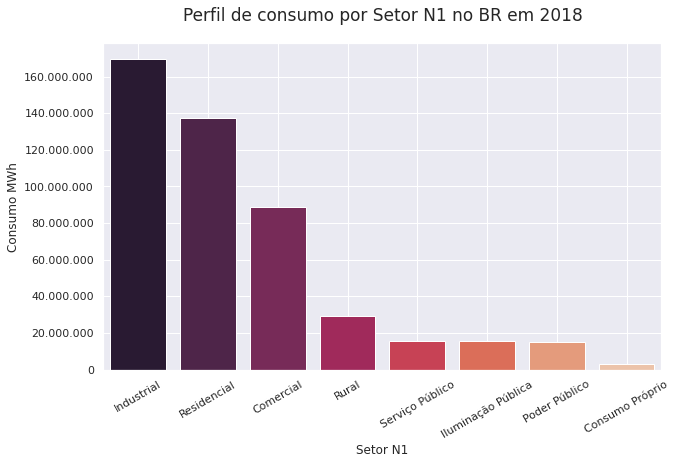

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=(DefSize))
ax = sns.barplot(data = anuario2018.groupby(['SetorN1']).sum().sort_values('Consumo',
    ascending=False).reset_index(),x='SetorN1',y='Consumo', palette = DefPaletteHist)
#plt.ylim(0,150)
plt.grid(True,linestyle = DefGrid)
plt.title('Perfil de consumo por Setor N1 no BR em 2018', fontsize=17, y=1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo MWh')
plt.xlabel('Setor N1')
plt.xticks(rotation = 30)
#ax.legend(loc='center right', bbox_to_anchor=(1.32, 0.5),ncol=1,fancybox=True, shadow=True)


In [ ]:
anuario2018.reset_index()[['Ano Mês','SetorN1','Consumo']].groupby(['Ano Mês','SetorN1']).sum('Consumo').reset_index()

Ano Mês             SetorN1       Consumo
0   2018-01           Comercial  7.611452e+06
1   2018-01     Consumo Próprio  2.920266e+05
2   2018-01  Iluminação Pública  1.332059e+06
3   2018-01          Industrial  1.385118e+07
4   2018-01       Poder Público  1.152329e+06
..      ...                 ...           ...
91  2018-12          Industrial  1.370169e+07
92  2018-12       Poder Público  1.310666e+06
93  2018-12         Residencial  1.163396e+07
94  2018-12               Rural  2.380272e+06
95  2018-12     Serviço Público  1.353480e+06

[96 rows x 3 columns]

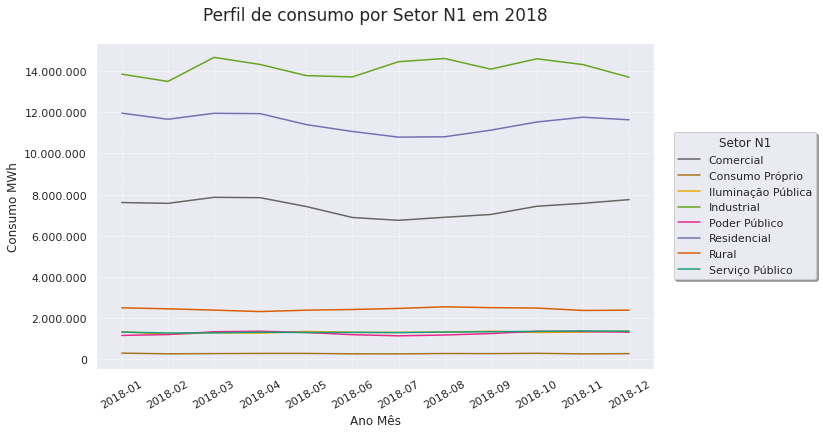

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=DefSize)
ax = sns.lineplot(data = anuario2018.reset_index()[['Ano Mês','SetorN1','Consumo']].groupby(['Ano Mês','SetorN1']).sum('Consumo').reset_index(),
                  x='Ano Mês', y ='Consumo', hue='SetorN1', palette=DefPalette) 
plt.xticks(rotation = 30)
#plt.ylim(0,150)
plt.grid(True,linestyle = ':')
plt.title('Perfil de consumo por Setor N1 em 2018', fontsize=17, y= 1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Consumo MWh',)
plt.xlabel('Ano Mês')
ax.legend(loc='center right', bbox_to_anchor=(1.30, 0.5),ncol=1,fancybox=True, shadow=True, title='Setor N1')

plt.show()

#### Desvio Padrão por Setor N1

In [ ]:
anuario2018_std = anuario2018.reset_index().groupby(
                    ['SetorN1']).std().sort_values(
                        by = 'Consumo',ascending=False).rename(
                            columns={"Consumo": "std"}).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

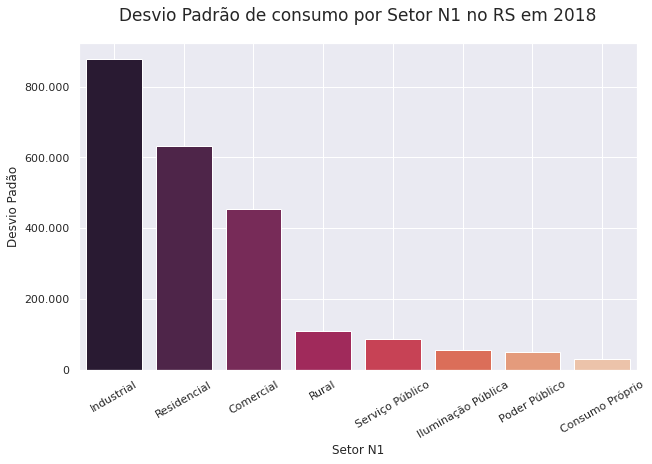

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=(DefSize))
ax = sns.barplot(data = anuario2018_std,
            x='SetorN1', y='std', palette = DefPaletteHist
            )
#plt.ylim(0,150)
plt.grid(True,linestyle = DefGrid)
plt.title('Desvio Padrão de consumo por Setor N1 no RS em 2018',
          fontsize=17, y=1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Desvio Padão')
plt.xlabel('Setor N1')
plt.xticks(rotation = 30)

In [ ]:
anuario2013_2018_std = anuario2013_2018.reset_index().groupby(
                    ['SetorN1']).std().sort_values(
                        by = 'Consumo',ascending=False).rename(
                            columns={"Consumo": "std"}).reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

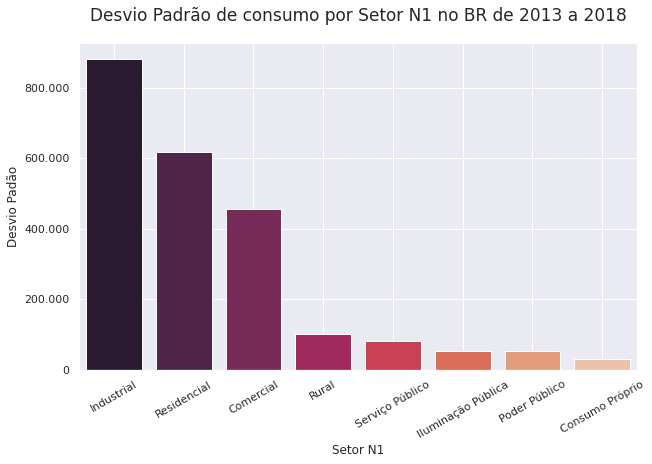

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
plt.figure(figsize=(DefSize))
ax = sns.barplot(data = anuario2013_2018_std,
            x='SetorN1', y='std', palette = DefPaletteHist
            )
#plt.ylim(0,150)
plt.grid(True,linestyle = DefGrid)
plt.title('Desvio Padrão de consumo por Setor N1 no BR de 2013 a 2018',
          fontsize=17, y=1.05)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.ylabel('Desvio Padão')
plt.xlabel('Setor N1')
plt.xticks(rotation = 30)

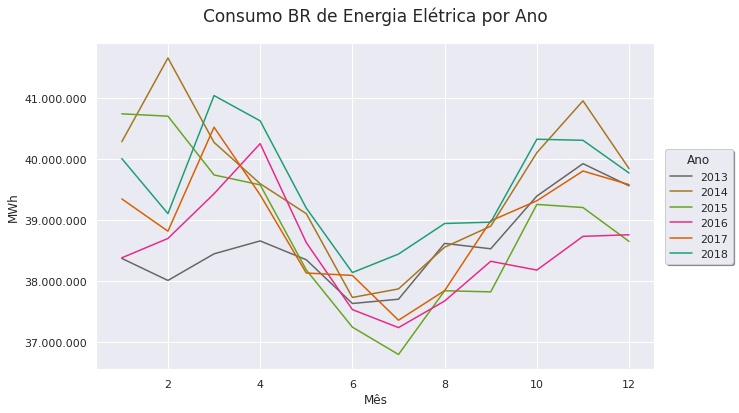

In [ ]:
sns.set_theme()
style.use(DefStyle)
plt.figure(figsize=DefSize)
ax = sns.lineplot( data=anuario2013_2018.reset_index()[['Ano','Mês','Consumo']].groupby(['Ano','Mês']).sum(),
                  x='Mês', y ='Consumo', hue='Ano', palette=DefPalette)
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5),ncol=1,fancybox=True,
          shadow=True, title = 'Ano')
plt.ylabel('MWh')
plt.title('Consumo BR de Energia Elétrica por Ano',y=1.05,fontsize = 17)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))

plt.grid(True,linestyle = DefGrid)
#plt.xticks(rotation = 30)
#plt.ylim(0,75000)

plt.show()

#### Decomposição e Corelação

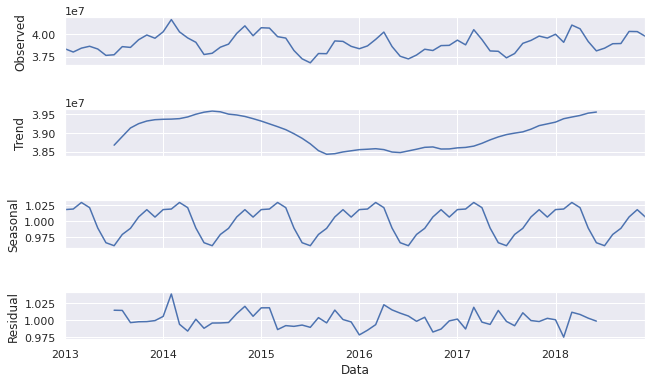

In [ ]:
decomposicao = seasonal_decompose(
    anuario2013_2018.reset_index()[['Data','Consumo']].set_index('Data').groupby('Data').sum(),
     model='multiplicative')
sns.set_theme()
style.use(DefStyle)
ax = decomposicao.plot()   
plt.gcf().set_size_inches(DefSize)
    
plt.show();

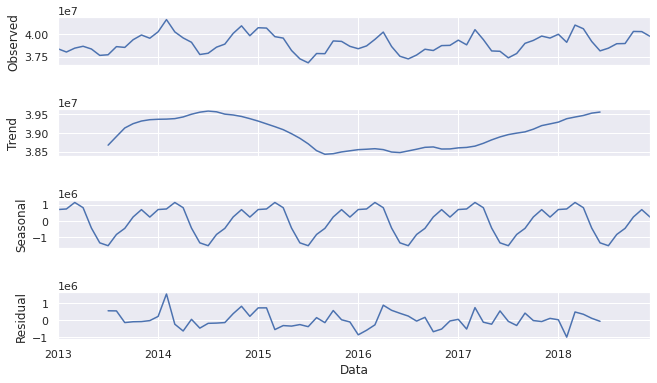

In [ ]:
decomposicao = seasonal_decompose(
    anuario2013_2018.reset_index()[['Data','Consumo']].set_index('Data').groupby('Data').sum()
    ,model='additive')
decomposicao.plot()
plt.gcf().set_size_inches(DefSize)
plt.show();

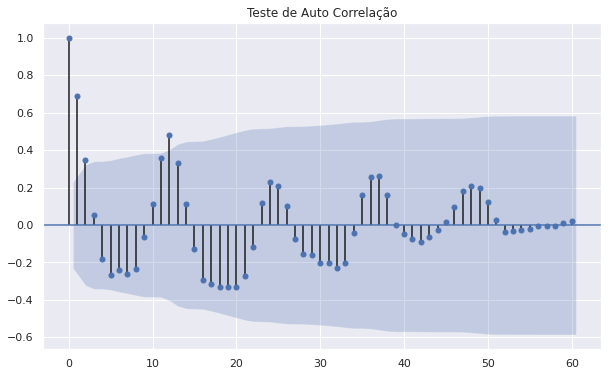

In [ ]:
ax = plot_acf(anuario2013_2018.reset_index()[['Data','Consumo']].set_index('Data').groupby('Data').sum()['Consumo'],lags=60);
style.use(DefStyle) 
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'})

plt.title('Teste de Auto Correlação')
plt.gcf().set_size_inches(10, 6)
plt.grid(True,linestyle = DefGrid)
plt.show();

>Auto Correlação Positiva forte a cada 12M

>Auto Correlação Inversa Média a cada 6M

>Indicando uma possivel relação com o clima e as estações 


### Análise BR por SetorN1

In [ ]:
def plt_perfil_ano(i):
    sns.set_theme()
    style.use(DefStyle)
    plt.figure(figsize=DefSize)
    data = anuario2013_2018.reset_index()[['Ano','Mês','SetorN1','Consumo']].groupby(['Ano','Mês','SetorN1']).sum()
    ax = sns.lineplot( data=data.reset_index().query(f"SetorN1 == '{i}'"),
                    x='Mês', y ='Consumo', hue='Ano', palette=DefPalette)
    ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5),ncol=1,fancybox=True,
            shadow=True, title = 'Ano')
    plt.ylabel('MWh')
    plt.title(f'Consumo BR de Energia Elétrica por Ano, Detalhe: SetorN1 = {i}'
            ,y=1.05,fontsize = 17)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))

    plt.grid(True,linestyle = DefGrid)
    #plt.xticks(rotation = 30)
    #plt.ylim(0,75000)

    plt.show()

In [ ]:
def plt_decomposicao(i):

    data = anuario2013_2018.reset_index()[['Data','SetorN1','Consumo']].groupby(['Data','SetorN1']).sum()
    data = data.query(f"SetorN1 == '{i}'").reset_index()
    data = data.set_index('Data').drop(columns=['SetorN1'])
    
    data.sample(5)

    decomposicao = seasonal_decompose(data,model='multiplicative')
    
    sns.set_theme()
    style.use(DefStyle)
    plt.figure(figsize=DefSize)
    ax = decomposicao.plot()   
    plt.gcf().set_size_inches(DefSize)
    axs = ax.get_axes()
    axs[0].set_title(f'Decomposição Temporal, Detalhe: SetorN1 = {i}')    
    plt.show();

In [ ]:
def plt_acf(i): 
    style.use(DefStyle) 

    data = anuario2013_2018.reset_index()[['Data','SetorN1','Consumo']].groupby(['Data','SetorN1']).sum()
    data = data.query(f"SetorN1 == '{i}'").reset_index()
    data = data.set_index('Data').drop(columns=['SetorN1'])
    plt.figure(figsize=DefSize)
    ax = plot_acf(data ,lags=60);
    #plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black'})

    plt.title(f'Teste de Auto Correlação, Detalhe: SetorN1 = {i}')
    plt.gcf().set_size_inches(10, 6)
    plt.grid(True,linestyle = DefGrid)
    plt.show();


In [ ]:
anuario2013_2018.reset_index()[['Data','SetorN1','Consumo']].groupby(['Data','SetorN1']).sum()

Consumo
Data       SetorN1                         
2013-01-01 Comercial           7.202468e+06
           Consumo Próprio     2.982187e+05
           Iluminação Pública  1.112275e+06
           Industrial          1.436952e+07
           Poder Público       1.150373e+06
...                                     ...
2018-12-01 Industrial          1.370169e+07
           Poder Público       1.310666e+06
           Residencial         1.163396e+07
           Rural               2.380272e+06
           Serviço Público     1.353480e+06

[576 rows x 1 columns]

########## 0 Residencial           ####################


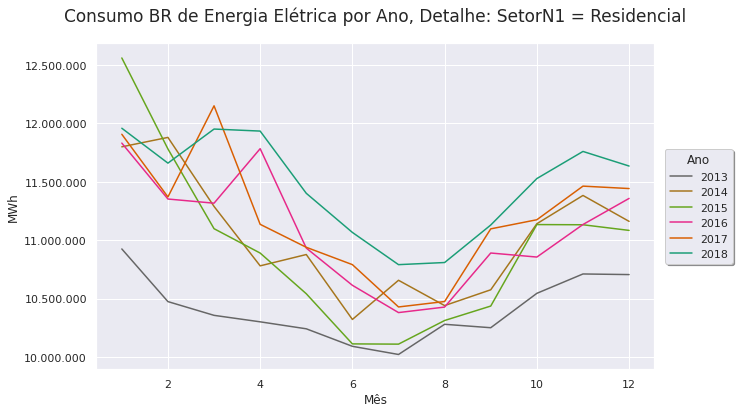

<Figure size 720x432 with 0 Axes>

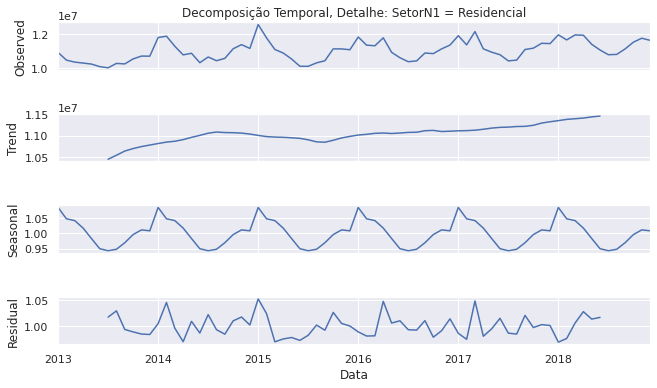

<Figure size 720x432 with 0 Axes>

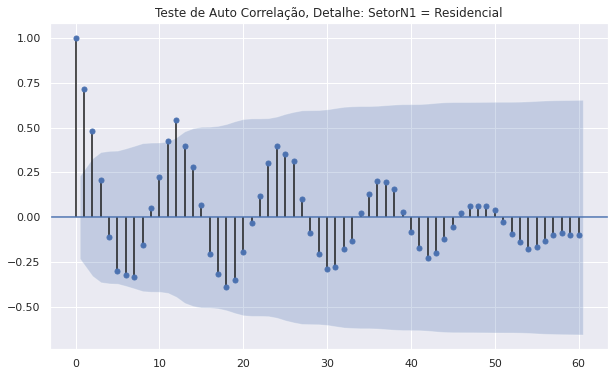

########## 1 Industrial            ####################


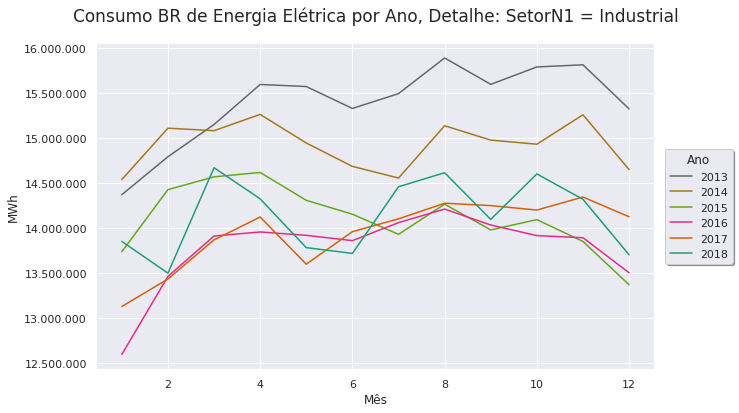

<Figure size 720x432 with 0 Axes>

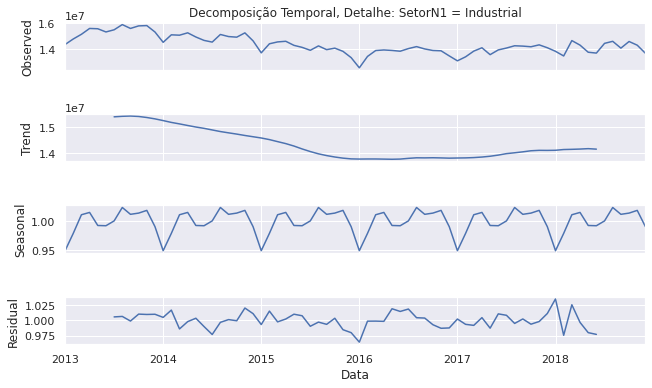

<Figure size 720x432 with 0 Axes>

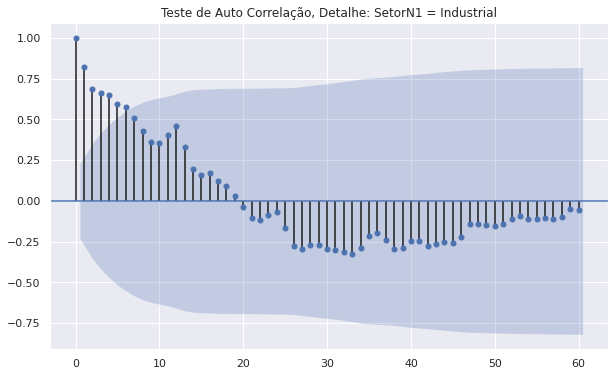

########## 2 Comercial             ####################


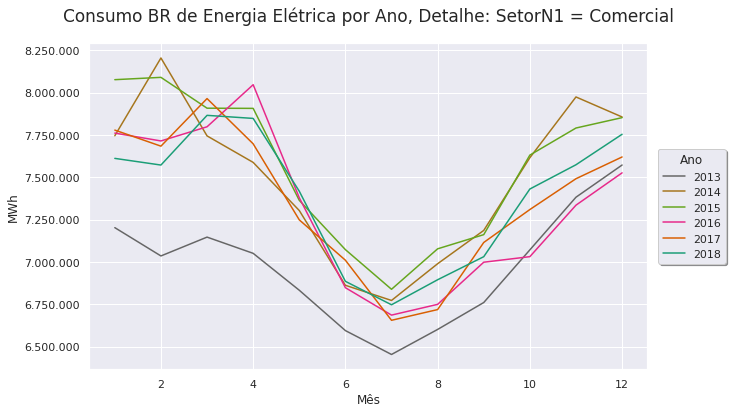

<Figure size 720x432 with 0 Axes>

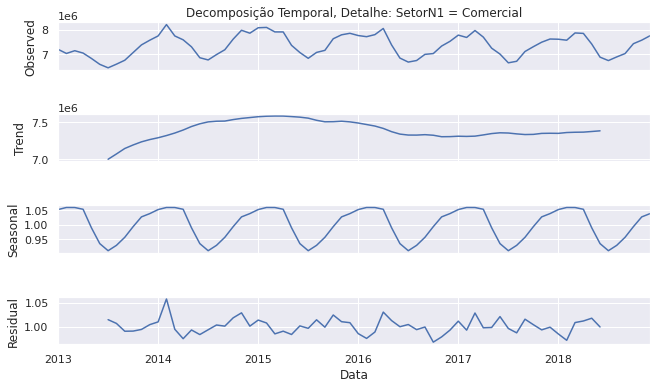

<Figure size 720x432 with 0 Axes>

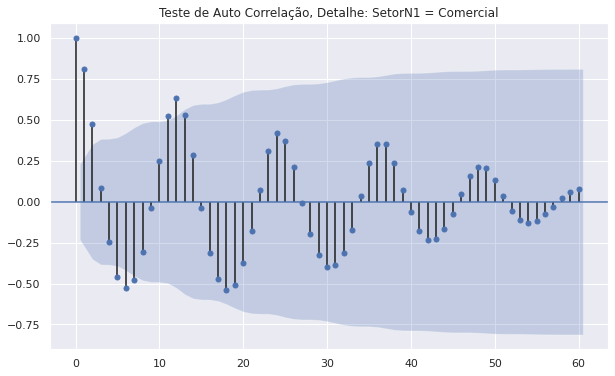

########## 3 Rural                 ####################


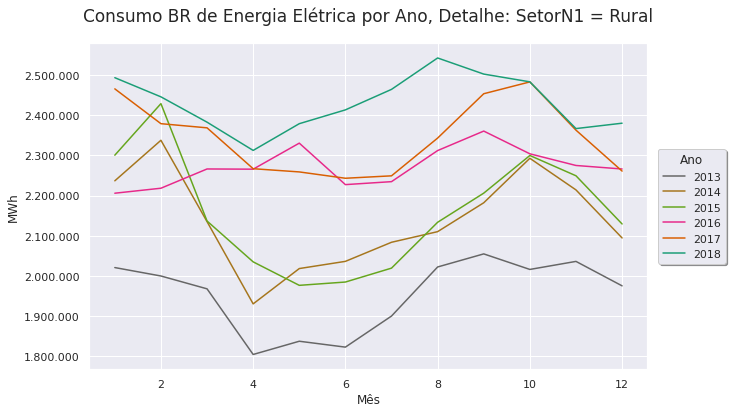

<Figure size 720x432 with 0 Axes>

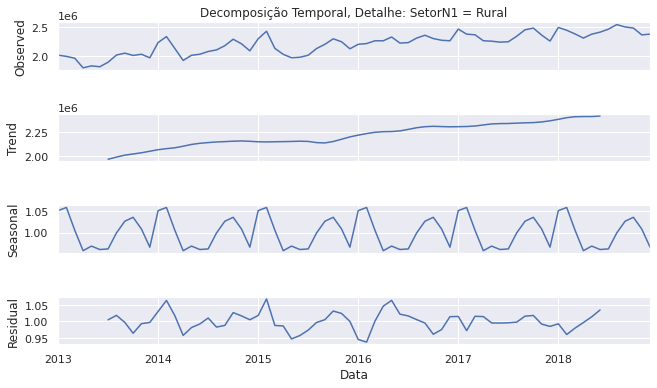

<Figure size 720x432 with 0 Axes>

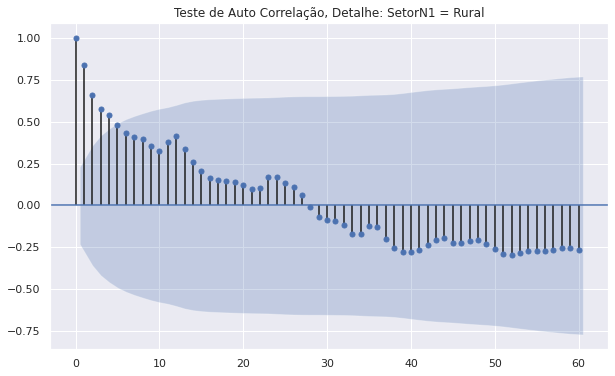

########## 4 Poder Público         ####################


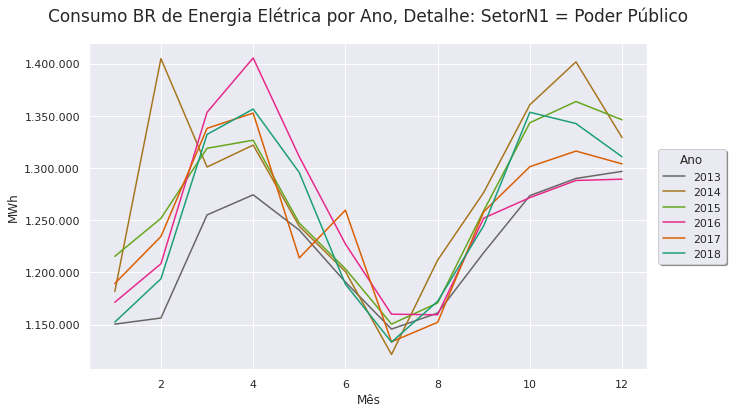

<Figure size 720x432 with 0 Axes>

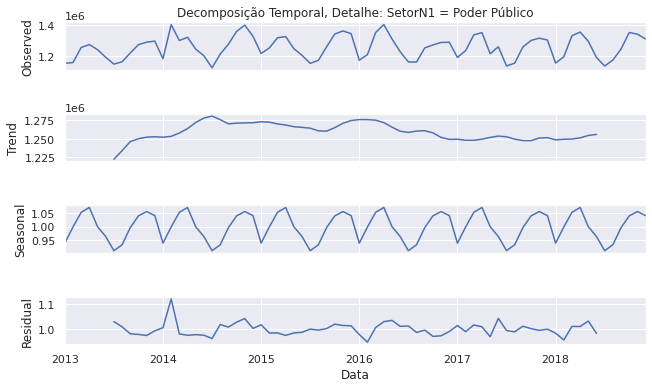

<Figure size 720x432 with 0 Axes>

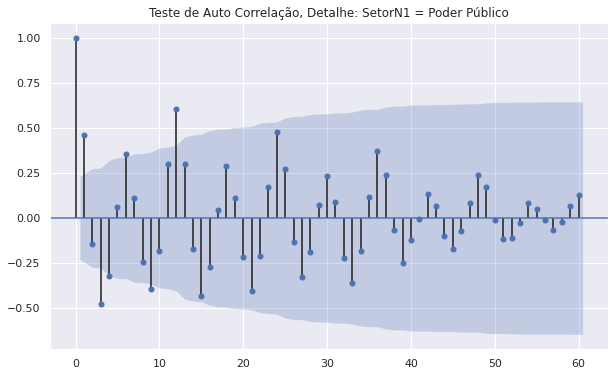

########## 5 Iluminação Pública    ####################


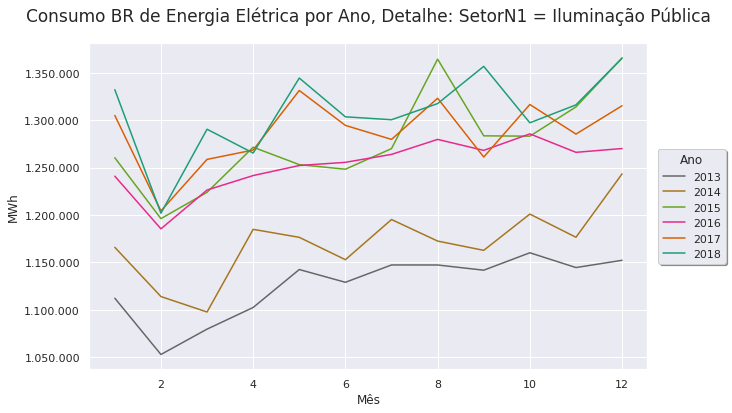

<Figure size 720x432 with 0 Axes>

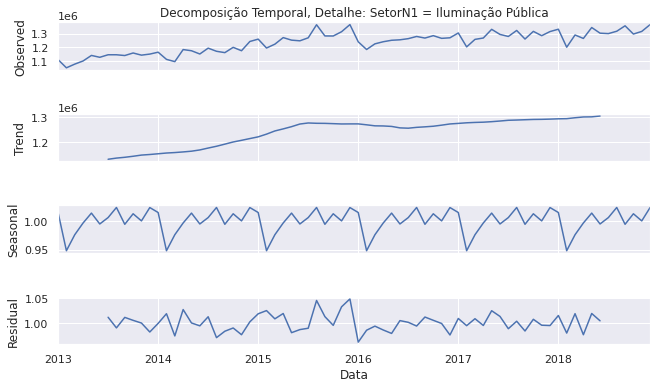

<Figure size 720x432 with 0 Axes>

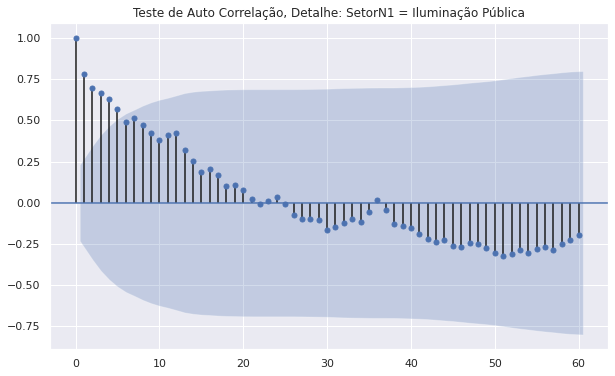

########## 6 Serviço Público       ####################


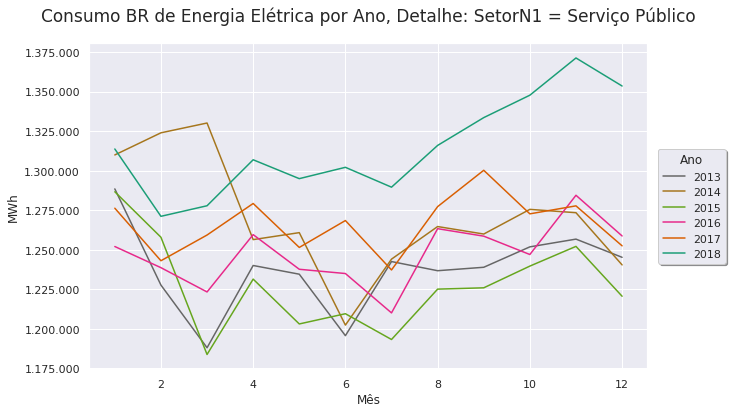

<Figure size 720x432 with 0 Axes>

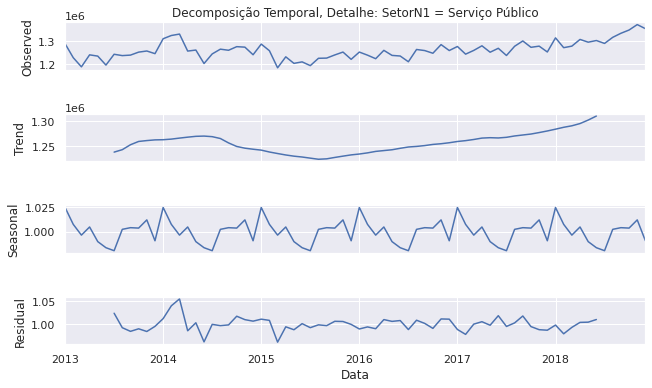

<Figure size 720x432 with 0 Axes>

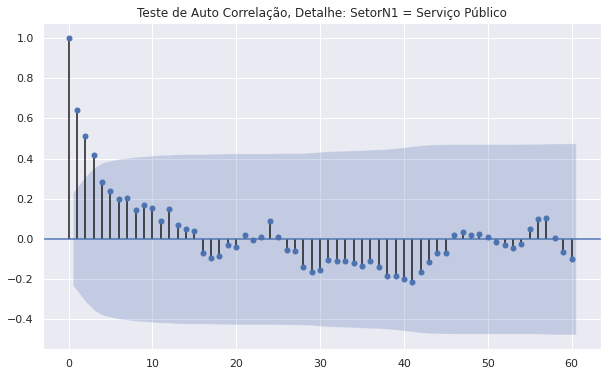

########## 7 Consumo Próprio       ####################


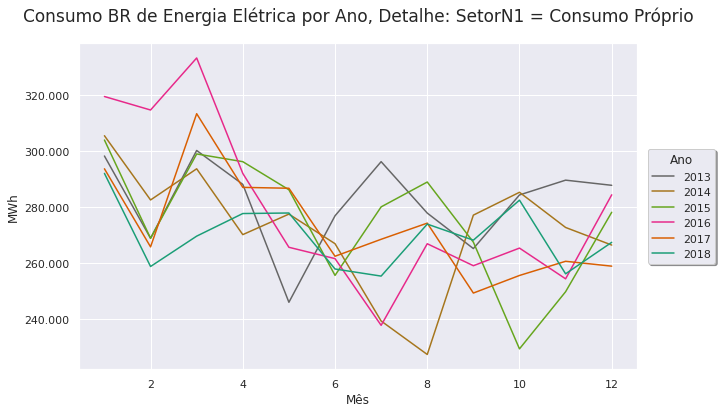

<Figure size 720x432 with 0 Axes>

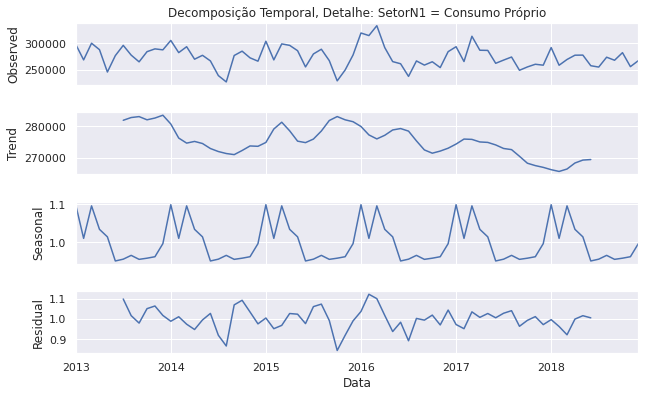

<Figure size 720x432 with 0 Axes>

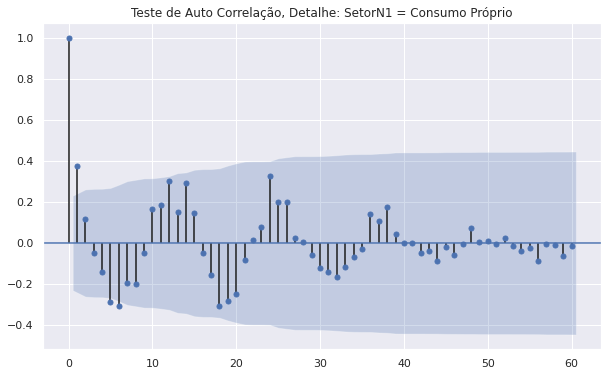

In [ ]:
for e,i in enumerate(SetorN1):
    print('#'*10,e,i,' '*(20-len(i)),'#'*20)
    plt_perfil_ano(i)
    plt_decomposicao(i)
    plt_acf(i)

## Dados INMET

In [ ]:
urlINMET = 'https://drive.google.com/u/0/uc?id=1FNrp311pEegFczI7NWCCXqG5BVPSHd6e&export=download'

In [ ]:
zipresp = urlopen(urlINMETRS)                # Download from URL
tempzip = open("/tmp/tempfile.zip", "wb")  # Create a new file
tempzip.write(zipresp.read())              # Write the contents of the downloaded file into the new file
tempzip.close()                            # Close the newly-created file
zip = ZipFile("/tmp/tempfile.zip")         # Re-open the newly-created file with ZipFile()

#Adaptado de 
#https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [ ]:
zipresp = urlopen(urlINMET)                # Download from URL
tempzip = open("/tmp/tempfile.zip", "wb")  # Create a new file
tempzip.write(zipresp.read())              # Write the contents of the downloaded file into the new file
tempzip.close()                            # Close the newly-created file
zip = ZipFile("/tmp/tempfile.zip")         # Re-open the newly-created file with ZipFile()

#Adaptado de 
#https://svaderia.github.io/articles/downloading-and-unzipping-a-zipfile/

In [ ]:
#zip.infolist()
listINMET = zip.namelist()

In [ ]:
zip.namelist()[0]

'$2a$10$OHzmmq.zdsLUvE7h5m19ceuuw43YVRtWaUYzTbEUxU7lY52BX2KcK/'

In [ ]:
zip.namelist()[1]

'$2a$10$OHzmmq.zdsLUvE7h5m19ceuuw43YVRtWaUYzTbEUxU7lY52BX2KcK/dados_A108_M_2015-05-13_2020-12-31.csv'

In [ ]:
pd.read_csv(zip.open(zip.namelist()[1]),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',').head(3)


Data Medicao  ...  Unnamed: 7
0   2015-05-31  ...         NaN
1   2015-06-30  ...         NaN
2   2015-07-31  ...         NaN

[3 rows x 8 columns]

In [ ]:
pd.read_csv(zip.open(zip.namelist()[1]),encoding='UTF-8', nrows=8, sep=';',parse_dates=True, decimal=',').head(3)


Nome: CRUZEIRO DO SUL
0     Codigo Estacao: A108
1    Latitude: -7.61083333
2  Longitude: -72.68138888

In [ ]:
zip.namelist()[1][-32:-28]

'A108'

In [ ]:
for e,i in enumerate(listINMET):
    #print(e,i)
    if e ==0:
        pass
    elif e == 1:
        climaD = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        climaD['origem'] = i[-32:-28]
    else:
        climaD2 = pd.read_csv(zip.open(i),encoding='UTF-8', skiprows=9, sep=';',parse_dates=True, decimal=',')
        climaD2['origem'] = i[-32:-28]
        climaD = climaD.append(climaD2)
#clima.sample(5)
climaD.shape

(51000, 9)

In [ ]:
climaD.head(3)

Data Medicao  ...  origem
0   2015-05-31  ...    A108
1   2015-06-30  ...    A108
2   2015-07-31  ...    A108

[3 rows x 9 columns]

In [ ]:
#Carregando todos cabeçalhos dos arquivos INMET
for e, i in enumerate(listINMET):
    if e ==0:
        pass

    elif e ==1:
        climaH = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                             parse_dates=True, decimal=',').T
        header = climaH.iloc[0]
        climaH.columns = header
        climaH = climaH[1:]
    else:
        climaH2 = pd.read_csv(zip.open(i), encoding='UTF-8', nrows=8, sep=': ',
                              parse_dates=True, decimal=',').T
        climaH2.columns = header
        climaH2 = climaH2[1:]
        climaH = climaH.append(climaH2)
climaH.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(604, 8)

In [ ]:
climaH.head(3)

Nome            Codigo Estacao  ... Periodicidade da Medicao
CRUZEIRO DO SUL           A108  ...                   Mensal
EPITACIOLANDIA            A140  ...                   Mensal
FEIJO                     A138  ...                   Mensal

[3 rows x 8 columns]

In [ ]:
climaH.Situacao.value_counts()

Operante      391
Pane          197
Desativada      8
Fechada         8
Name: Situacao, dtype: int64

In [ ]:
climaH = climaH.reset_index().set_index('Codigo Estacao').rename(columns={'index':'Cidade','Codigo Estacao':'origem'})

In [ ]:
climaH.head(3)

Nome                     Cidade  ... Periodicidade da Medicao
Codigo Estacao                   ...                         
A108            CRUZEIRO DO SUL  ...                   Mensal
A140             EPITACIOLANDIA  ...                   Mensal
A138                      FEIJO  ...                   Mensal

[3 rows x 8 columns]

In [ ]:
climaD = climaD.fillna(method='ffill')

In [ ]:
climaD.head(3)

Data Medicao  ...  origem
0   2015-05-31  ...    A108
1   2015-06-30  ...    A108
2   2015-07-31  ...    A108

[3 rows x 9 columns]

In [ ]:
colunasNomes = {
    'Data Medicao':'data',
    'NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)':'Dias_com_precip',
    'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)':'precipitacao',
    'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)':'pressao',
    'TEMPERATURA MEDIA, MENSAL (AUT)(°C)':'temperatura',
    'VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)':'vento_max',
    'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)':'vento_med', 
    'Unnamed: 7':'un',
    'origem':'origem'
}
climaD.rename(columns=colunasNomes, inplace = True)
climaD.drop(columns=['un'], inplace = True)
climaD.columns

Index(['data', 'Dias_com_precip', 'precipitacao', 'pressao', 'temperatura',
       'vento_max', 'vento_med', 'origem'],
      dtype='object')

In [ ]:
#Cabeçalhos
climaH.head(3)


Nome                     Cidade  ... Periodicidade da Medicao
Codigo Estacao                   ...                         
A108            CRUZEIRO DO SUL  ...                   Mensal
A140             EPITACIOLANDIA  ...                   Mensal
A138                      FEIJO  ...                   Mensal

[3 rows x 8 columns]

In [ ]:
clima = pd.merge(climaD,climaH, left_on='origem', right_on='Codigo Estacao', how='right')

In [ ]:
clima.head(3)

data  Dias_com_precip  ...  Data Final  Periodicidade da Medicao
0  2015-05-31              7.0  ...  2020-12-31                    Mensal
1  2015-06-30             12.0  ...  2020-12-31                    Mensal
2  2015-07-31             13.0  ...  2020-12-31                    Mensal

[3 rows x 16 columns]

In [ ]:
clima.Situacao.value_counts()

Operante      32531
Pane          17566
Fechada         550
Desativada      353
Name: Situacao, dtype: int64

In [ ]:
# Excluindo Estações em Pane
clima = clima.query("Situacao != 'Pane' ")

In [ ]:
parametros = climaD.columns[1:-1]
parametros

Index(['Dias_com_precip', 'precipitacao', 'pressao', 'temperatura',
       'vento_max', 'vento_med'],
      dtype='object')

In [ ]:
clima[['data','temperatura']].groupby('data').mean()

temperatura
data                   
2013-01-31    23.393484
2013-02-28    23.715527
2013-03-31    23.309656
2013-04-30    21.982866
2013-05-31    20.882498
...                 ...
2020-08-31    20.597029
2020-09-30    22.562058
2020-10-31    23.165546
2020-11-30    22.824053
2020-12-31    23.416454

[96 rows x 1 columns]

In [ ]:
Mediatemperatura = clima[['data','temperatura']].groupby('data').mean()
Mediatemperatura.rename(columns={'temperatura':('temperatura','media')}, inplace = True)

MediaDias_com_precip = clima[['data','Dias_com_precip']].groupby('data').mean()
MediaDias_com_precip.rename(columns={'Dias_com_precip':('Dias_com_precip','media')}, inplace = True)

Mediaprecipitacao = clima[['data','precipitacao']].groupby('data').mean()
Mediaprecipitacao.rename(columns={'precipitacao':('precipitacao','media')}, inplace = True)

Mediapressao = clima[['data','pressao']].groupby('data').mean()
Mediapressao.rename(columns={'pressao':('pressao','media')}, inplace = True)

Mediavento_max = clima[['data','vento_max']].groupby('data').mean()
Mediavento_max.rename(columns={'vento_max':('vento_max','media')}, inplace = True)

Mediavento_med = clima[['data','vento_med']].groupby('data').mean()
Mediavento_med.rename(columns={'vento_med':('vento_med','media')}, inplace = True)

In [ ]:
clima_med=clima[['data','Cidade',*parametros]].groupby(['data','Cidade']).mean()

#clima[['data','temperatura','Cidade']].pivot(['Cidade']) #.groupby(['data']).mean()#.pivot('data','Cidade').head(3)

In [ ]:
climaPivot = clima_med.reset_index()[['data','temperatura','Cidade']].pivot('data','Cidade')
climaPivot = pd.merge(climaPivot, Mediatemperatura, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','Dias_com_precip','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, MediaDias_com_precip, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','precipitacao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediaprecipitacao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','pressao','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediapressao, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','vento_max','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_max, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot2 = clima_med.reset_index()[['data','vento_med','Cidade']].pivot('data','Cidade')
climaPivot2 = pd.merge(climaPivot2, Mediavento_med, right_on='data', left_on='data')
climaPivot = pd.merge(climaPivot, climaPivot2, right_on='data', left_on='data')

climaPivot.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


temperatura                             ... vento_med                  
Cidade        AGUA BOA AGUA CLARA AGUAS EMENDADAS  ...  XINGUARA ZE DOCA     media
data                                               ...                            
2013-01-31   24.425806  26.518280       21.403551  ...       NaN     NaN  2.168308
2013-02-28   24.792857  26.250298       22.561161  ...       NaN     NaN  2.085319
2013-03-31   24.792857  26.078592       22.074569  ...       NaN     NaN  1.993334
2013-04-30   24.792857  23.018472       20.956250  ...       NaN     NaN  1.816252
2013-05-31   24.792857  22.097984       20.208468  ...       NaN     NaN  1.772881

[5 rows x 2436 columns]

In [ ]:
def analise_correlacao(par):
    '''
    Fitra prarâmetro no data frame para gerar mapa de correlação e ranking
    par: entrada de parâmento  
    return mapa de correlação e ranking 
    '''

    display(par)
    df = climaPivot[par]
    #display(df.head())
    #display(df.corr())
    
    plt.figure(figsize=(30,30))
    ax = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True) 
    plt.title('Correlação Cruzada de '+ par,fontsize=20,y=1.10)
    plt.show();

    ranking = climaPivot[par].corr().sum()
    ranking.sort_values(ascending=False, inplace=True)
    rangingCorrMed = ranking/len(ranking)
    #sns.barplot(rangingCorrMed.reset_index())
    plt.figure(figsize=DefSize)
    ax = rangingCorrMed[:10].plot(kind='bar')
    plt.title('Ranking top 10 maiores correlações médias de '+ par,fontsize=17,y=1.05)
    plt.ylim(rangingCorrMed[10],rangingCorrMed.max())
    plt.show();


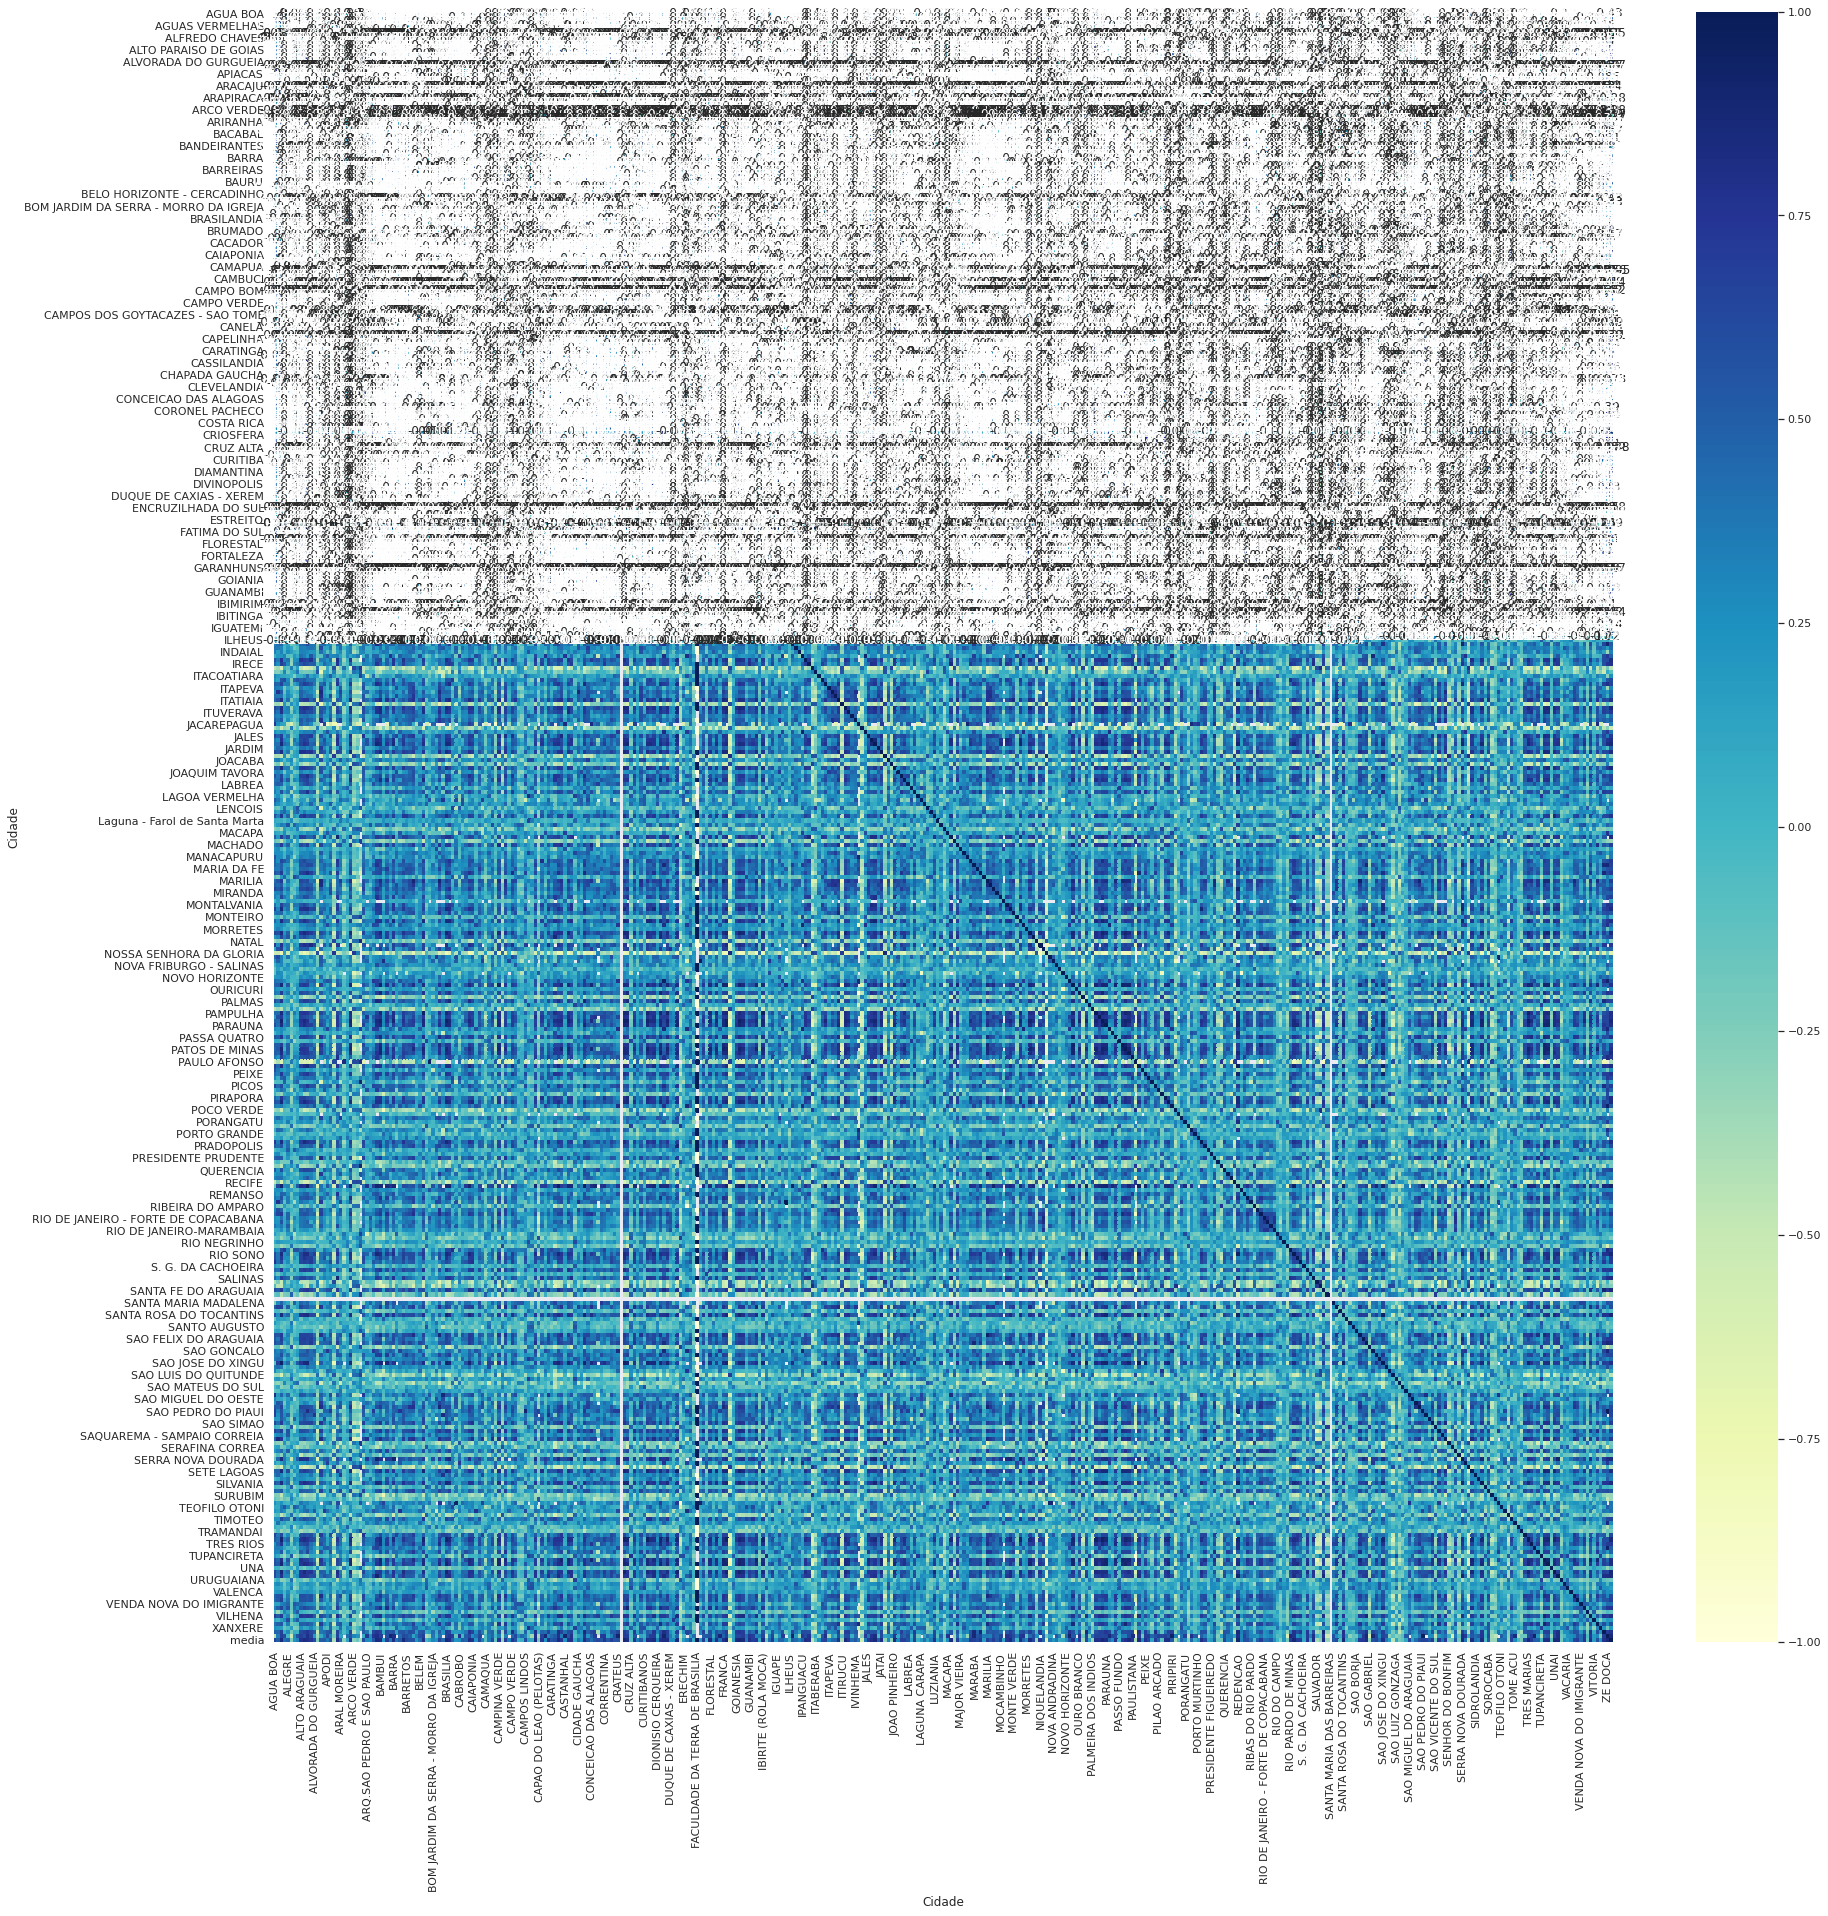

In [ ]:
for i in parametros:
    analise_correlacao(i)

In [ ]:
d = {('dt','data'): climaPivot.reset_index()['data'],
     ('dt','Ano'): climaPivot.reset_index()['data'].str[0:4],
     ('dt','Mês'): climaPivot.reset_index()['data'].str[5:7],
     ('dt','Ano Mês'): climaPivot.reset_index()['data'].str[0:7]}
datas = pd.DataFrame(d)

In [ ]:
climaPivot = pd.merge(climaPivot,datas['dt'],right_on='data',left_on=('data'))
climaPivot.rename(columns={'Ano':('dt','Ano'),'Mês':('dt','Mês'),'Ano Mês':('dt','Ano Mês')}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
climaPivot.head()

data  (temperatura, AGUA BOA)  ...  (dt, Mês)  (dt, Ano Mês)
0  2013-01-31                24.425806  ...         01        2013-01
1  2013-02-28                24.792857  ...         02        2013-02
2  2013-03-31                24.792857  ...         03        2013-03
3  2013-04-30                24.792857  ...         04        2013-04
4  2013-05-31                24.792857  ...         05        2013-05

[5 rows x 2440 columns]

No handles with labels found to put in legend.


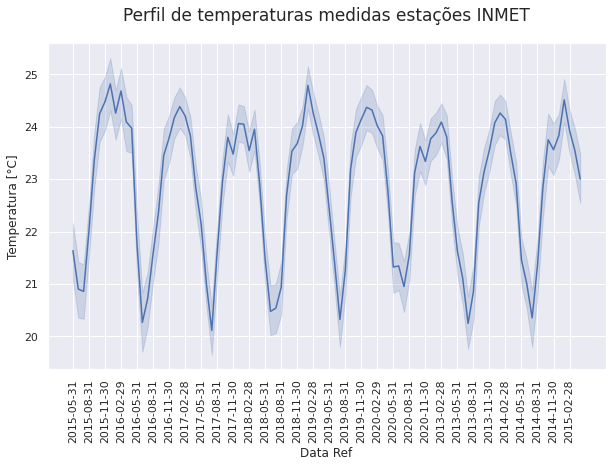

In [ ]:
plt.figure(figsize=DefSize)
ax = sns.lineplot(data = climaEX,x = 'data', y= 'temperatura')#, hue='Cidade')
plt.title('Perfil de temperaturas medidas estações INMET', fontsize = 17, y=1.05)
plt.ylabel('Temperatura [°C]')
plt.xlabel('Data Ref')
plt.xticks(rotation = 90)
plt.legend().remove()
ax.set_xticks(ax.get_xticks()[::3])
plt.show();

In [ ]:
parametrosT = ['Dias com Precipitação', 'Precipitacão', 'Pressão', 'Temperatura',
       'Vento Maxímo', 'Vento Médio']

parametrosU = ['', '[mm]', '[mB]', '[°C]',
       '[m/s]', '[m/s]']

len(parametros)

6

In [ ]:
climaPivot.sample(3)

data  (temperatura, AGUA BOA)  ...  (dt, Mês)  (dt, Ano Mês)
71  2018-12-31                25.007661  ...         12        2018-12
36  2016-01-31                24.582930  ...         01        2016-01
86  2020-03-31                25.205506  ...         03        2020-03

[3 rows x 2440 columns]

In [ ]:
def perfil_medio_clima(_i, _Prefixo = 'Perfil Médio de ', _Escopo = ' no BR'):
    '''
    Gera gráficos de perfis de históricos climáticos apartir de Dataframe e
     Parâmetros de entrada
    '''
    dfTemp = climaPivot[[('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),(parametros[_i],'media')]].reset_index()
    dfTemp.columns = ['col1','Ano','Mês','Ano Mês',parametros[_i]]
    dfTemp.drop('col1', axis =1, inplace = True)
    sns.set_theme()
    style.use(DefStyle)
    plt.figure(figsize=DefSize)
    plt.title(_Prefixo + parametrosT[_i] + _Escopo,y=1.05,fontsize = 17)
    ax = sns.lineplot(data=dfTemp,palette=DefPalette, x = 'Mês', y = parametros[_i], hue = 'Ano') #'hsv'
    plt.grid(True,linestyle = ':')
    #plt.xticks(rotation = 30)

    ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), ncol=1, fancybox=False, shadow=True, title = 'Ano')
    plt.ylabel(parametrosT[_i] + ' ' + parametrosU[_i])
    plt.xlabel('Mês')
    plt.show()

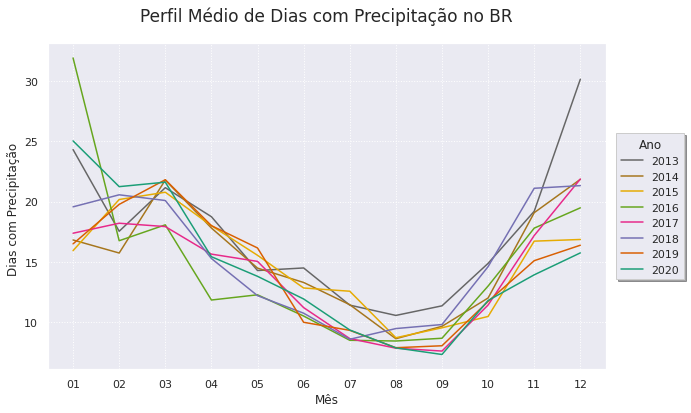

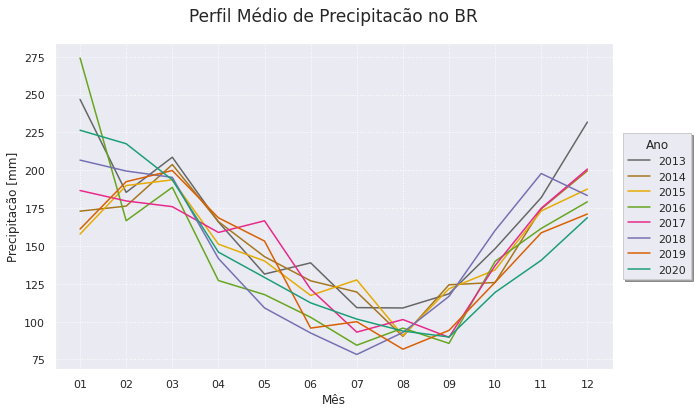

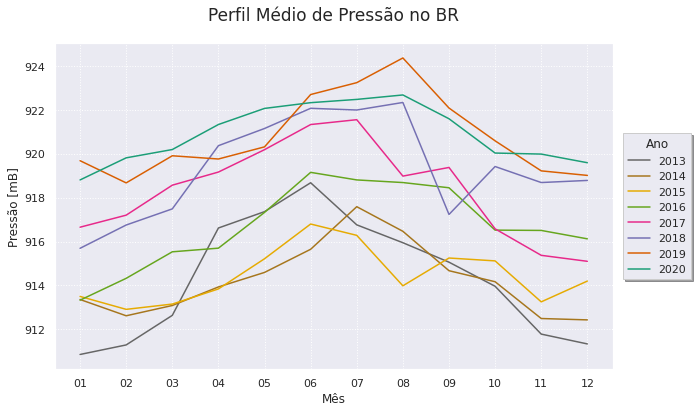

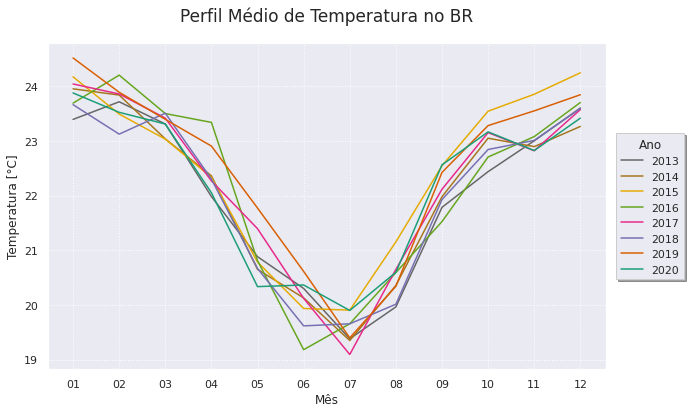

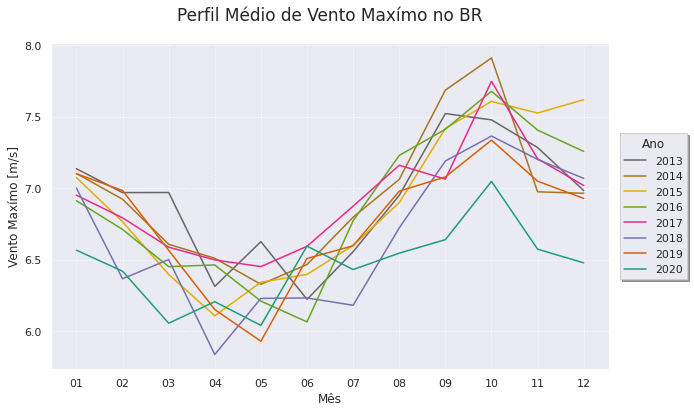

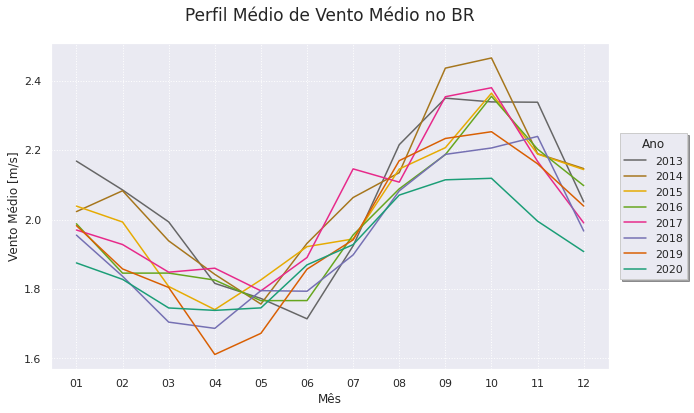

In [ ]:
for i in range(0,len(parametros)):
    perfil_medio_clima(i, 'Perfil Médio de ', ' no BR')

##Juntando DF

In [ ]:
climaPivot.sample(5)

data  (temperatura, AGUA BOA)  ...  (dt, Mês)  (dt, Ano Mês)
20  2014-09-30                28.034167  ...         09        2014-09
7   2013-08-31                25.315054  ...         08        2013-08
83  2019-12-31                25.205506  ...         12        2019-12
28  2015-05-31                23.951882  ...         05        2015-05
64  2018-05-31                23.872312  ...         05        2018-05

[5 rows x 2440 columns]

In [ ]:
dfClimaMed = climaPivot[[('data'),('dt', 'Ano'),('dt', 'Mês'),('dt', 'Ano Mês'),('Dias_com_precip','media'),
            ('precipitacao','media'),('pressao','media'),('temperatura','media'),
            ('vento_max','media'),('vento_med','media')]].reset_index()

dfClimaMed.columns = ['col1','Data','Ano','Mês','Ano Mês','Dias com Precipitação',
                  'Precipitação','Pressão','Temperatura','Vento Máx','Vento Méd']
dfClimaMed.drop('col1', axis =1, inplace = True)
dfClimaMed.head()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Data   Ano Mês  Ano Mês  ...     Pressão  Temperatura  Vento Máx  Vento Méd
0  2013-01-31  2013  01  2013-01  ...  910.844015    23.393484   7.138098   2.168308
1  2013-02-28  2013  02  2013-02  ...  911.280033    23.715527   6.971059   2.085319
2  2013-03-31  2013  03  2013-03  ...  912.630237    23.309656   6.971698   1.993334
3  2013-04-30  2013  04  2013-04  ...  916.620874    21.982866   6.314890   1.816252
4  2013-05-31  2013  05  2013-05  ...  917.368179    20.882498   6.627884   1.772881

[5 rows x 10 columns]

In [ ]:
VarClima = dfClimaMed.corr().columns

In [ ]:
dfClimaMed.corr()

Dias com Precipitação  ...  Vento Méd
Dias com Precipitação               1.000000  ...  -0.254933
Precipitação                        0.962851  ...  -0.157339
Pressão                            -0.491102  ...  -0.268353
Temperatura                         0.648791  ...   0.159135
Vento Máx                          -0.077353  ...   0.902535
Vento Méd                          -0.254933  ...   1.000000

[6 rows x 6 columns]

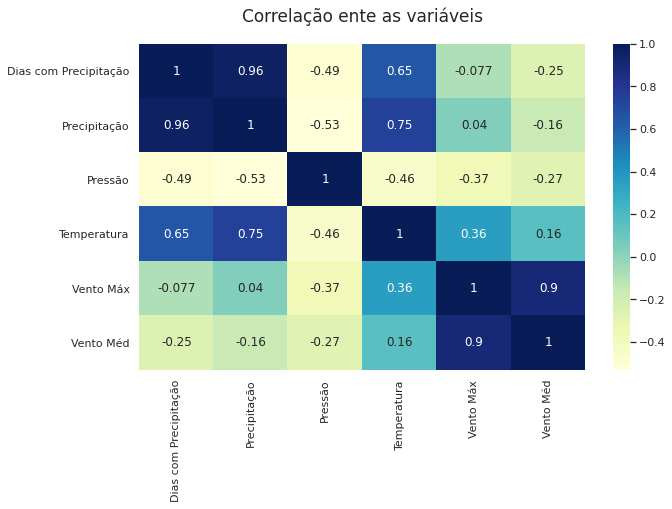

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfClimaMed.corr(),cmap="YlGnBu", annot=True) 

In [ ]:
anuario2013_2018[['Ano','Mês','Data','Ano Mês','SetorN1','Consumo']]

Ano  Mês       Data  Ano Mês          SetorN1     Consumo
0      2013    1 2013-01-01  2013-01        Comercial   16078.000
1      2013    1 2013-01-01  2013-01        Comercial   57359.000
2      2013    1 2013-01-01  2013-01        Comercial   98262.000
3      2013    1 2013-01-01  2013-01        Comercial   19815.000
4      2013    1 2013-01-01  2013-01        Comercial  275492.000
...     ...  ...        ...      ...              ...         ...
15547  2018   12 2018-12-01  2018-12  Serviço Público   61748.919
15548  2018   12 2018-12-01  2018-12  Serviço Público   30086.955
15549  2018   12 2018-12-01  2018-12  Serviço Público   19223.852
15550  2018   12 2018-12-01  2018-12  Serviço Público  468829.596
15551  2018   12 2018-12-01  2018-12  Serviço Público    5075.911

[15552 rows x 6 columns]

In [ ]:
anuario2013_2018_pvt = anuario2013_2018[['Ano','Mês','Data','Ano Mês','SetorN1','Consumo']]
anuario2013_2018_pvt = anuario2013_2018_pvt.groupby(['Ano','Mês','Data','Ano Mês','SetorN1']).mean()
anuario2013_2018_pvt = anuario2013_2018_pvt.reset_index().pivot(index=['Ano','Mês','Data','Ano Mês'], columns='SetorN1')
anuario2013_2018_pvt = anuario2013_2018_pvt.reset_index()
anuario2013_2018_pvt.head()

Ano Mês       Data  ...        Consumo                              
SetorN1                       ...    Residencial         Rural Serviço Público
0        2013   1 2013-01-01  ...  404625.370370  74837.222222    47720.888889
1        2013   2 2013-02-01  ...  387945.518519  74059.925926    45470.555556
2        2013   3 2013-03-01  ...  383592.444444  72874.629630    44003.814815
3        2013   4 2013-04-01  ...  381540.185185  66817.962963    45928.629630
4        2013   5 2013-05-01  ...  379330.148148  68039.333333    45725.111111

[5 rows x 12 columns]

In [ ]:
col0 = anuario2013_2018_pvt.droplevel(0,axis=1).columns
col1 = anuario2013_2018_pvt.droplevel(1,axis=1).columns

In [ ]:
col = [c for c in col1 if c != 'Consumo'] + [c for c in col0 if c != '']

In [ ]:
anuario2013_2018_pvt = anuario2013_2018_pvt.droplevel(0,axis=1)
anuario2013_2018_pvt.columns = col
anuario2013_2018_pvt.sample(5)

Ano  Mês       Data  ...    Residencial         Rural  Serviço Público
43  2016    8 2016-08-01  ...  386213.777778  85632.629630     46790.074074
36  2016    1 2016-01-01  ...  438151.703704  81697.962963     46372.925926
30  2015    7 2015-07-01  ...  374472.296296  74785.333333     44196.814815
18  2014    7 2014-07-01  ...  394701.407407  77170.888889     46077.296296
63  2018    4 2018-04-01  ...  441961.231519  85646.391704     48402.752519

[5 rows x 12 columns]

In [ ]:
dfClimaMed['Data'] = pd.to_datetime(dfClimaMed['Data'])

In [ ]:
dfClimaMed.head()

Data   Ano Mês  Ano Mês  ...     Pressão  Temperatura  Vento Máx  Vento Méd
0 2013-01-31  2013  01  2013-01  ...  910.844015    23.393484   7.138098   2.168308
1 2013-02-28  2013  02  2013-02  ...  911.280033    23.715527   6.971059   2.085319
2 2013-03-31  2013  03  2013-03  ...  912.630237    23.309656   6.971698   1.993334
3 2013-04-30  2013  04  2013-04  ...  916.620874    21.982866   6.314890   1.816252
4 2013-05-31  2013  05  2013-05  ...  917.368179    20.882498   6.627884   1.772881

[5 rows x 10 columns]

In [ ]:
dfClimaMed.columns

Index(['Data', 'Ano', 'Mês', 'Ano Mês', 'Dias com Precipitação',
       'Precipitação', 'Pressão', 'Temperatura', 'Vento Máx', 'Vento Méd'],
      dtype='object')

In [ ]:
anuario2013_2018_pvt.columns

Index(['Ano', 'Mês', 'Data', 'Ano Mês', 'Comercial', 'Consumo Próprio',
       'Iluminação Pública', 'Industrial', 'Poder Público', 'Residencial',
       'Rural', 'Serviço Público'],
      dtype='object')

In [ ]:
dfClimaMed.drop(columns=['Data']).head(2)

Ano Mês  Ano Mês  ...  Temperatura  Vento Máx  Vento Méd
0  2013  01  2013-01  ...    23.393484   7.138098   2.168308
1  2013  02  2013-02  ...    23.715527   6.971059   2.085319

[2 rows x 9 columns]

In [ ]:
anuario2013_2018_pvt.drop(columns=['Data','Ano','Mês']).head(2)

Ano Mês      Comercial  ...         Rural  Serviço Público
0  2013-01  266758.074074  ...  74837.222222     47720.888889
1  2013-02  260570.666667  ...  74059.925926     45470.555556

[2 rows x 9 columns]

In [ ]:
anuario2013_2018[['Ano Mês','Consumo']].groupby('Ano Mês').sum().head(2)

Consumo
Ano Mês              
2013-01  3.836681e+07
2013-02  3.800565e+07

In [ ]:
dfConsumoClima = pd.merge(dfClimaMed.drop(columns=['Data']),
                          anuario2013_2018_pvt.drop(columns=['Data','Ano','Mês']),left_on='Ano Mês',right_on='Ano Mês')


In [ ]:
dfConsumoClima = pd.merge(dfConsumoClima,
                          anuario2013_2018[['Ano Mês','Consumo']].groupby('Ano Mês').sum(),left_on='Ano Mês',right_on='Ano Mês')

In [ ]:
dfConsumoClima

Ano Mês  Ano Mês  ...         Rural  Serviço Público       Consumo
0   2013  01  2013-01  ...  74837.222222     47720.888889  3.836681e+07
1   2013  02  2013-02  ...  74059.925926     45470.555556  3.800565e+07
2   2013  03  2013-03  ...  72874.629630     44003.814815  3.844219e+07
3   2013  04  2013-04  ...  66817.962963     45928.629630  3.865366e+07
4   2013  05  2013-05  ...  68039.333333     45725.111111  3.834486e+07
..   ...  ..      ...  ...           ...              ...           ...
67  2018  08  2018-08  ...  94177.500148     48738.515852  3.893907e+07
68  2018  09  2018-09  ...  92690.307222     49389.220704  3.896136e+07
69  2018  10  2018-10  ...  91974.867593     49913.747630  4.032103e+07
70  2018  11  2018-11  ...  87661.500667     50785.107296  4.030350e+07
71  2018  12  2018-12  ...  88158.205556     50128.884556  3.976661e+07

[72 rows x 18 columns]

In [ ]:
dfConsumoClima['Ano'] = dfConsumoClima['Ano'].astype(int)
dfConsumoClima.corr()

Ano  ...   Consumo
Ano                    1.000000  ...  0.122646
Dias com Precipitação -0.130370  ...  0.436272
Precipitação          -0.113672  ...  0.475419
Pressão                0.681035  ... -0.300654
Temperatura            0.007246  ...  0.669397
Vento Máx             -0.148164  ...  0.092553
Vento Méd             -0.188177  ...  0.044045
Comercial              0.156894  ...  0.815638
Consumo Próprio       -0.125656  ...  0.264207
Iluminação Pública     0.793997  ... -0.030445
Industrial            -0.678578  ...  0.130065
Poder Público          0.059884  ...  0.685625
Residencial            0.502246  ...  0.785834
Rural                  0.839754  ...  0.347076
Serviço Público        0.498014  ...  0.546242
Consumo                0.122646  ...  1.000000

[16 rows x 16 columns]

In [ ]:
stl[14]

'seaborn-darkgrid'

In [ ]:
VarClima

Index(['Dias com Precipitação', 'Precipitação', 'Pressão', 'Temperatura',
       'Vento Máx', 'Vento Méd'],
      dtype='object')

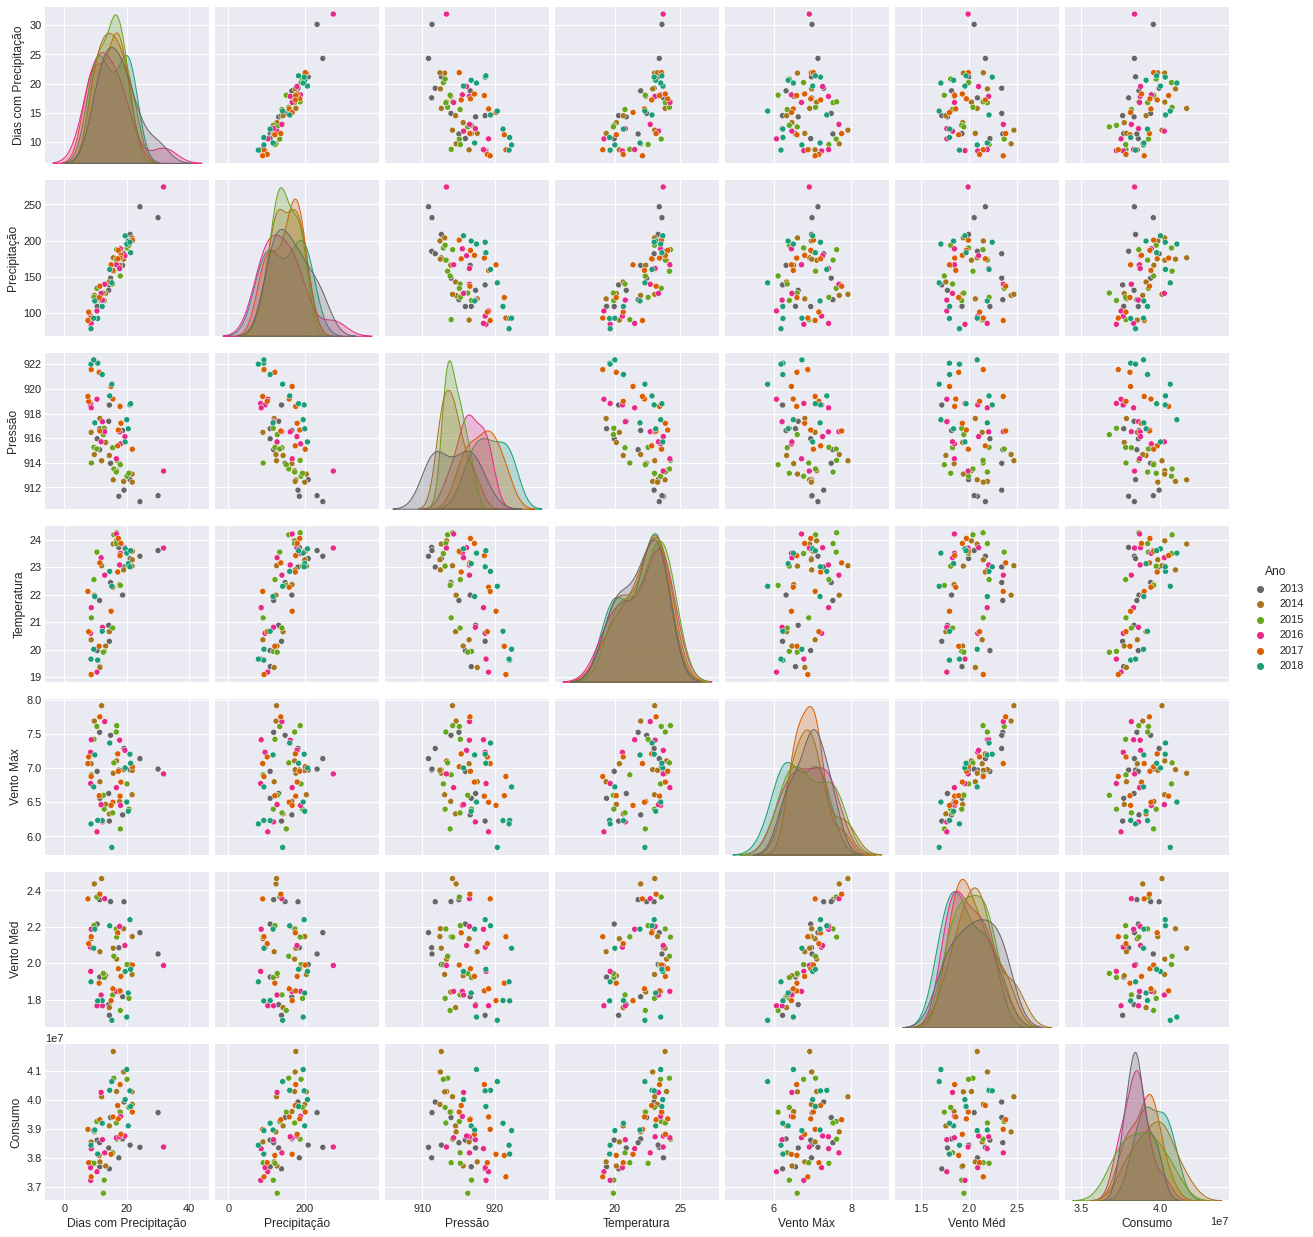

In [ ]:
sns.set_theme()
style.use(stl[14])  #4
#style.context('ss')
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','axes.labelcolor':'white','ytick.color':'white', 'figure.facecolor':'black'})
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black', 'title.color':'white' })
g = sns.pairplot(dfConsumoClima[['Ano', *VarClima, 'Consumo']], hue = "Ano", palette=DefPalette)
#g.map(sns.scatterplot)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.map(sns.lineplot)
#g.xticks(rotation = 90)
#plt.gcf().set_size_inches()
#print(g)


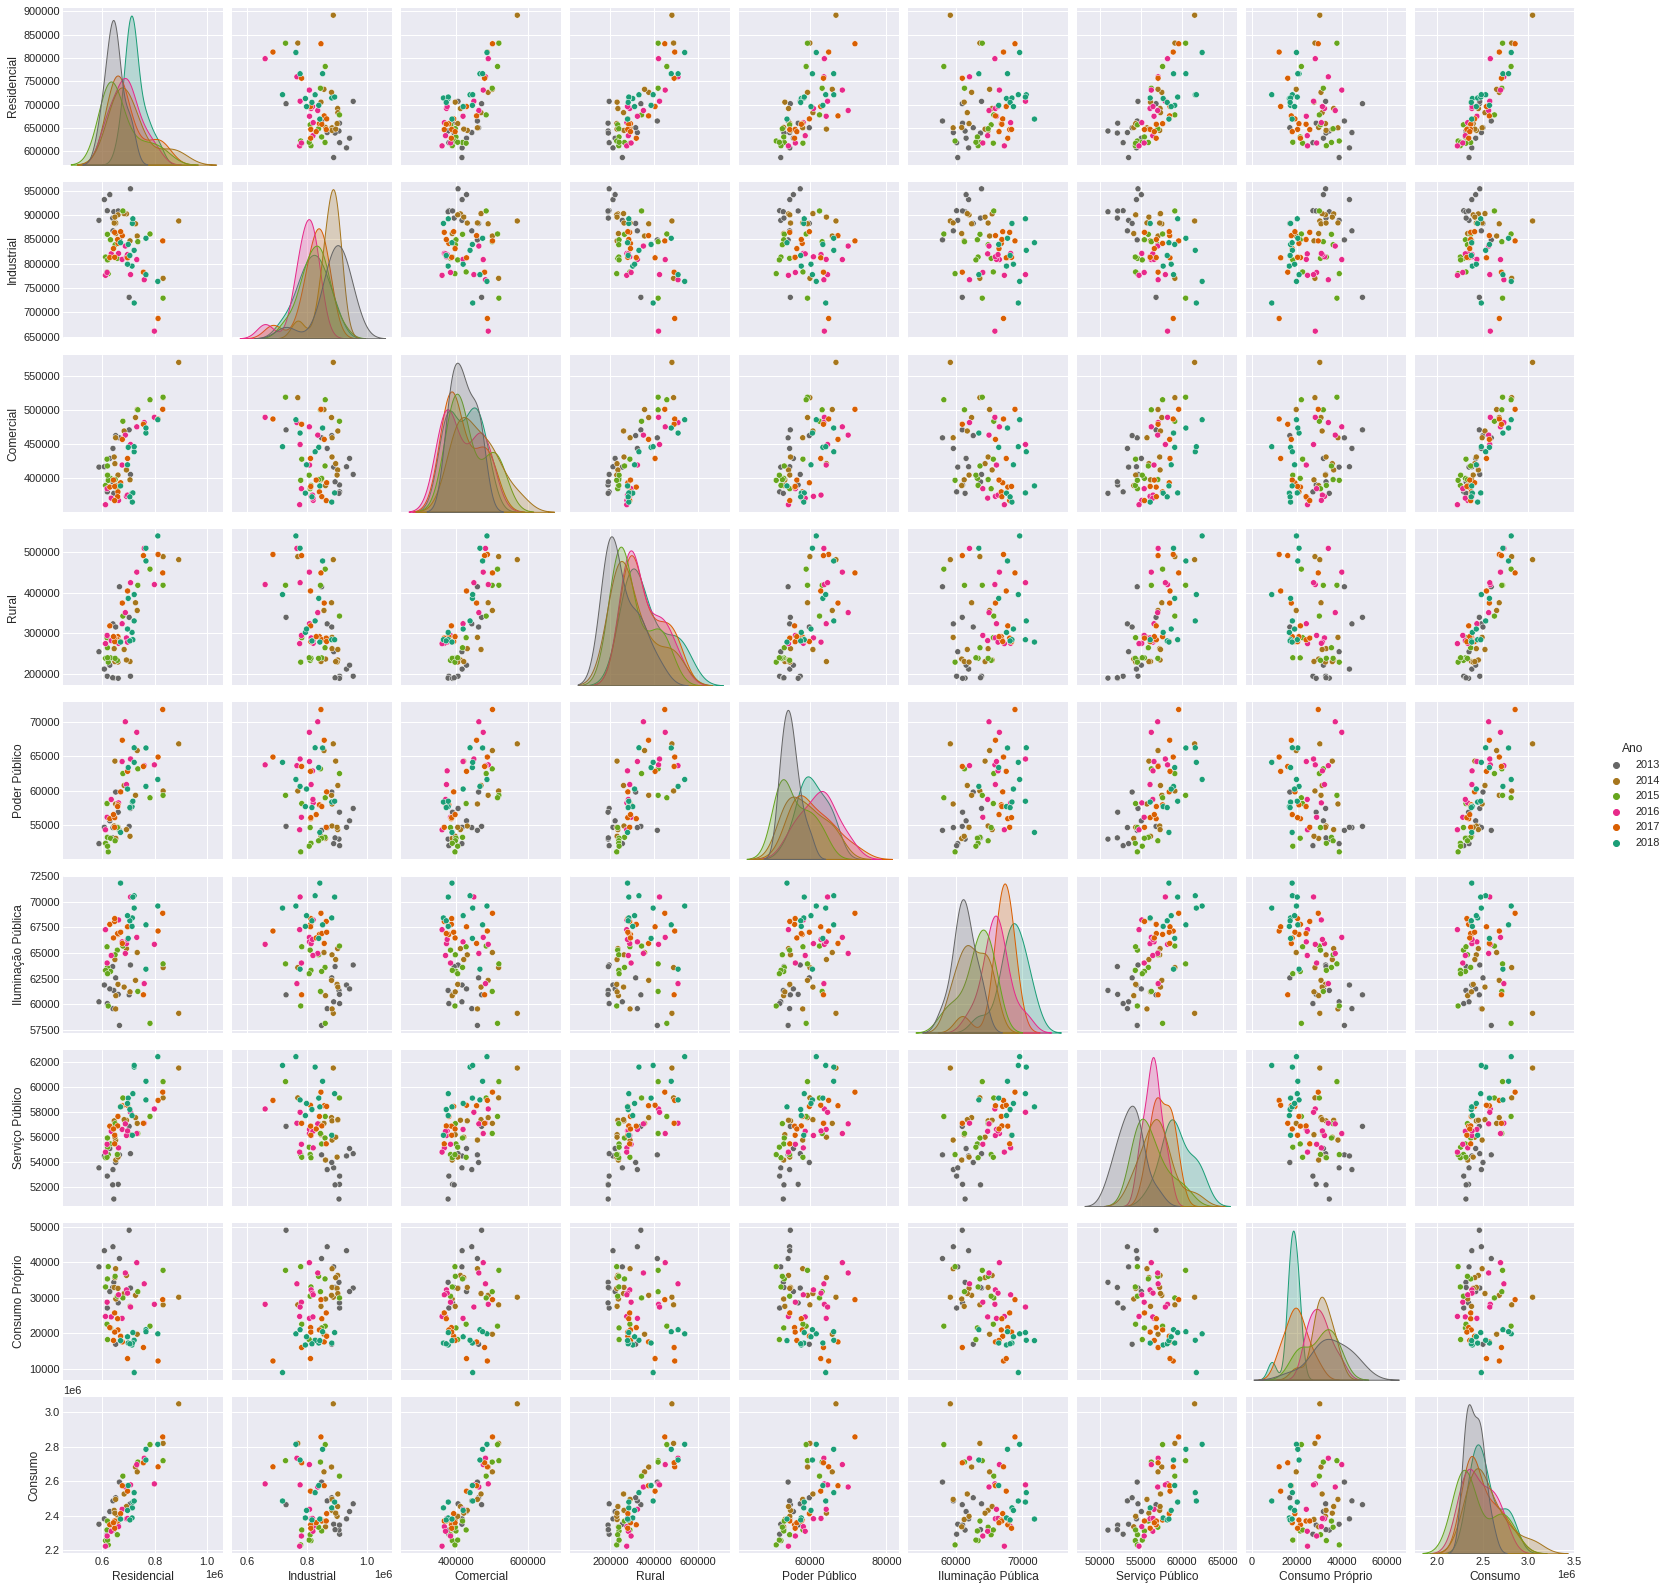

In [ ]:
sns.set_theme()
style.use(stl[14])  #4
#style.context('ss')
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','axes.labelcolor':'white','ytick.color':'white', 'figure.facecolor':'black'})
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'black', 'title.color':'white' })
g = sns.pairplot(dfConsumoClima[['Ano', *SetorN1, 'Consumo']], hue = "Ano", palette=DefPalette)
#g.map(sns.scatterplot)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.map(sns.lineplot)
#g.xticks(rotation = 90)
#plt.gcf().set_size_inches()
#print(g)

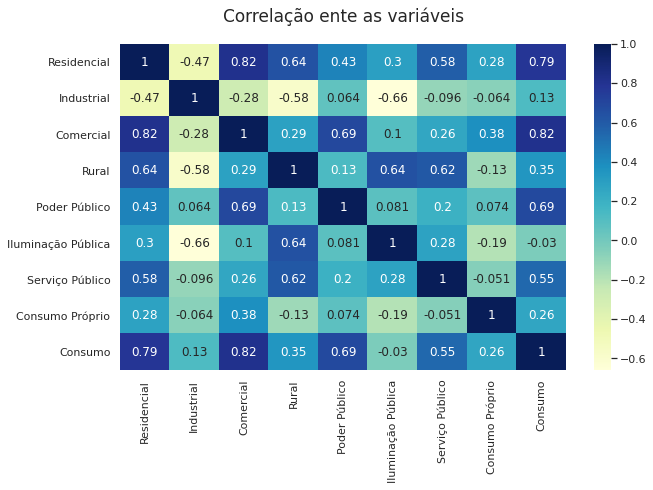

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfConsumoClima[[*SetorN1,'Consumo']].corr(),cmap="YlGnBu", annot=True) 

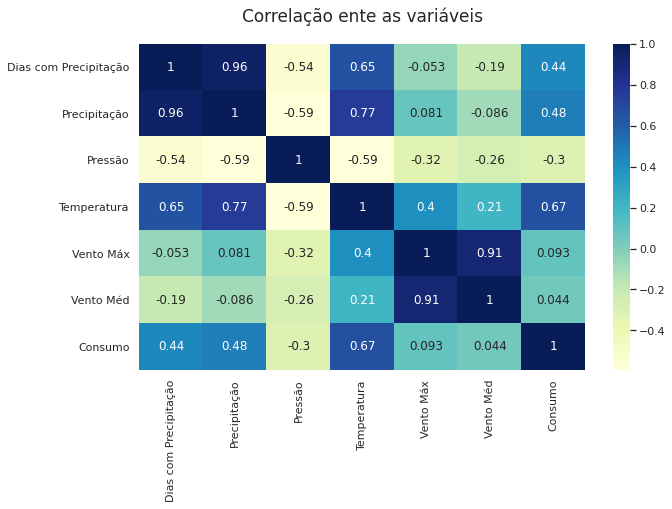

In [ ]:
sns.set_theme()
style.use(DefStyle)  #4
#plt.rc_context({'axes.edgecolor':'gray', 'xtick.color':'white', 'axes.titlecolor':'white','ytick.color':'white', 'figure.facecolor':'black'})

plt.figure(figsize=DefSize)
plt.title('Correlação ente as variáveis',y=1.05,fontsize = 17)
ax = sns.heatmap(dfConsumoClima[[*VarClima,'Consumo']].corr(),cmap="YlGnBu", annot=True) 

##Abordagem inicial

###Média Aritmética

In [ ]:
dfConsumoClima['Consumo Médio'] = dfConsumoClima['Consumo'].mean()
mean_absolute_percentage_error(dfConsumoClima['Consumo'],dfConsumoClima['Consumo Médio'])

0.022118302051074942

### Regressão Linear

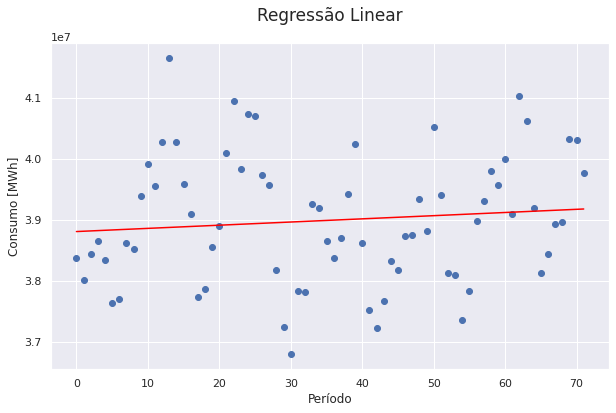

0.02182180888888872

In [ ]:
data = dfConsumoClima['Consumo'].reset_index()
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

sns.set_theme()
style.use(DefStyle)
plt.figure(figsize=DefSize)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regressão Linear', fontsize = 17, y=1.05)
plt.ylabel('Consumo [MWh]')
plt.xlabel('Período')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
plt.show();

dfConsumoClima['Rlin'] = Y_pred
display(mean_absolute_percentage_error(dfConsumoClima['Consumo'],Y_pred))

In [ ]:
def perfil_consumo_vs_prev():
    sns.set_theme()
    style.use(DefStyle) 
    plt.figure(figsize=DefSize)

    ax1 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Consumo'], label = 'Real', palette = 'Dark2')
    ax2 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Consumo Médio'], label = 'Médio',palette = 'Dark2')
    ax3 = sns.lineplot(dfConsumoClima['Ano Mês'],dfConsumoClima['Rlin'], label = 'Rlin',palette = 'Dark2')
    plt.legend()
    plt.grid(True,linestyle = DefGrid)
    plt.title('Perfil de Consumo no RS Previsto', fontsize=17, y=1.05)
    ax3.yaxis.set_major_formatter(ticker.FuncFormatter(formatador_de_milhares))
    plt.ylabel('Consumo [MWh]')
    ax3.set_xticks(ax3.get_xticks()[::3])
    plt.xticks(rotation = 90, fontsize=10)

    plt.show()
    ;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


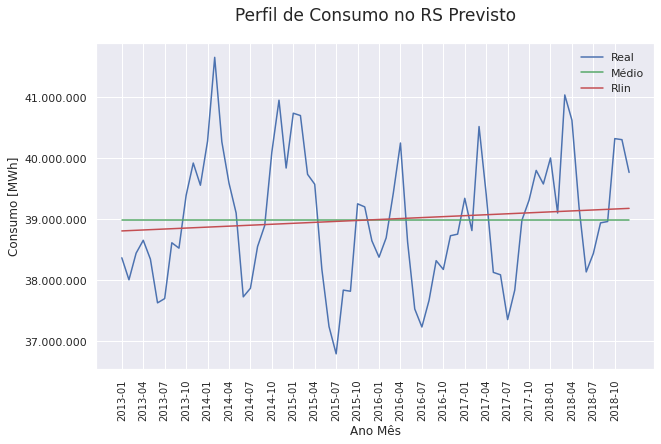

In [ ]:
perfil_consumo_vs_prev()

In [ ]:
dfConsumoClima.sample(2)

Ano Mês  Ano Mês  ...       Consumo  Consumo Médio          Rlin
15  2014  04  2014-04  ...  3.959185e+07   3.899216e+07  3.888537e+07
9   2013  10  2013-10  ...  3.938900e+07   3.899216e+07  3.885412e+07

[2 rows x 20 columns]

In [ ]:
dfConsumoClima[[*SetorN1]]

Comercial  Consumo Próprio  ...         Rural  Serviço Público
0   266758.074074     11045.138444  ...  74837.222222     47720.888889
1   260570.666667      9959.619259  ...  74059.925926     45470.555556
2   264688.185185     11118.057444  ...  72874.629630     44003.814815
3   261140.296296     10671.089926  ...  66817.962963     45928.629630
4   253070.777778      9114.576519  ...  68039.333333     45725.111111
..            ...              ...  ...           ...              ...
67  255364.747296     10146.375704  ...  94177.500148     48738.515852
68  260405.596963      9934.438296  ...  92690.307222     49389.220704
69  275206.363556     10462.473889  ...  91974.867593     49913.747630
70  280510.367407      9490.105222  ...  87661.500667     50785.107296
71  287176.631148      9905.806481  ...  88158.205556     50128.884556

[72 rows x 8 columns]

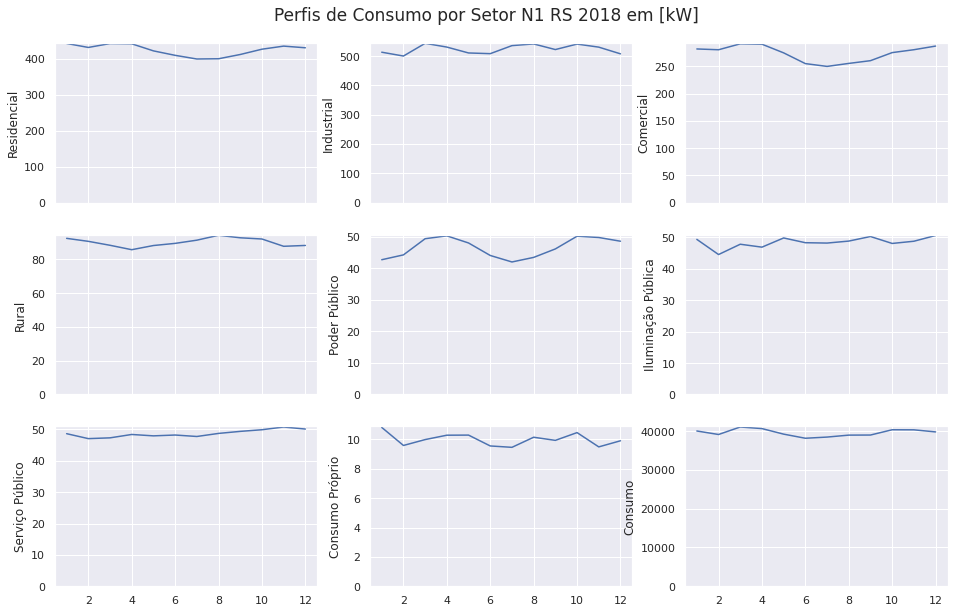

In [ ]:
df = dfConsumoClima[['Residencial','Industrial','Comercial','Rural',
                   'Poder Público','Iluminação Pública','Serviço Público',
                   'Consumo Próprio','Consumo']]

fig, axs = plt.subplots(3, 3, figsize=(16, 10), sharex=True,)
count = 0 
for x in range(3):
    for y in range(3):
        sns.lineplot(ax=axs[x,y], x=range(1,13), y=df.tail(12).iloc[:,count]/1000)
        #axs[x,y].set_ylim(0)
        count +=1
plt.suptitle(x=.5,y=.93,t='Perfis de Consumo por Setor N1 RS 2018 em [kW]', fontsize = 17)
plt.show();



In [ ]:
dfConsumoClima.to_csv(swap+'BR_2013_2018_df_consumo_clima.csv', index=False)